<a href="https://colab.research.google.com/github/TouaziAimenRyad/BIKE-RENTAL-TIME-SERIES/blob/main/PROJET_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Disclaimer
for this project i didn't consider the seasons as it was mentioned because we use see the data data you find that 1 for exp is with january meaning that season 1 is winter not spring as it was mentioned 

In [ ]:
#importing libraries
install.packages("lubridate")
install.packages("tseries")
install.packages("forecast")
install.packages("TTR")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#installing libraries
library(lubridate)
library(tseries)
library(forecast)
library(TTR)
library(data.table)
library(ggplot2)


Loading required package: timechange

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




In [ ]:
#importing the data
data_day<- read.csv("/content/day.csv")
data_hour<-read.csv("/content/hour.csv") 
head(data_day)
head(data_hour)

instant dteday     season yr mnth holiday weekday workingday weathersit
1 1       2011-01-01 1      0  1    0       6       0          2         
2 2       2011-01-02 1      0  1    0       0       0          2         
3 3       2011-01-03 1      0  1    0       1       1          1         
4 4       2011-01-04 1      0  1    0       2       1          1         
5 5       2011-01-05 1      0  1    0       3       1          1         
6 6       2011-01-06 1      0  1    0       4       1          1         
  temp     atemp    hum      windspeed casual registered cnt 
1 0.344167 0.363625 0.805833 0.1604460 331     654        985
2 0.363478 0.353739 0.696087 0.2485390 131     670        801
3 0.196364 0.189405 0.437273 0.2483090 120    1229       1349
4 0.200000 0.212122 0.590435 0.1602960 108    1454       1562
5 0.226957 0.229270 0.436957 0.1869000  82    1518       1600
6 0.204348 0.233209 0.518261 0.0895652  88    1518       1606

instant dteday     season yr mnth hr holiday weekday workingday weathersit
1 1       2011-01-01 1      0  1    0  0       6       0          1         
2 2       2011-01-01 1      0  1    1  0       6       0          1         
3 3       2011-01-01 1      0  1    2  0       6       0          1         
4 4       2011-01-01 1      0  1    3  0       6       0          1         
5 5       2011-01-01 1      0  1    4  0       6       0          1         
6 6       2011-01-01 1      0  1    5  0       6       0          2         
  temp atemp  hum  windspeed casual registered cnt
1 0.24 0.2879 0.81 0.0000    3      13         16 
2 0.22 0.2727 0.80 0.0000    8      32         40 
3 0.22 0.2727 0.80 0.0000    5      27         32 
4 0.24 0.2879 0.75 0.0000    3      10         13 
5 0.24 0.2879 0.75 0.0000    0       1          1 
6 0.24 0.2576 0.75 0.0896    0       1          1

In [ ]:
#getting some info on the data 
summary(data_day)

    instant         dteday              season            yr        
 Min.   :  1.0   Length:731         Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   Mode  :character   Median :3.000   Median :1.0000  
 Mean   :366.0                      Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0                      Max.   :4.000   Max.   :1.0000  
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.000  
   weathersit         temp             atemp    

In [ ]:
summary(data_hour)

    instant         dteday              season            yr        
 Min.   :    1   Length:17379       Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Mode  :character   Median :3.000   Median :1.0000  
 Mean   : 8690                      Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379                      Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weathersit         te

#1- ***DATA EXAMINATION:***


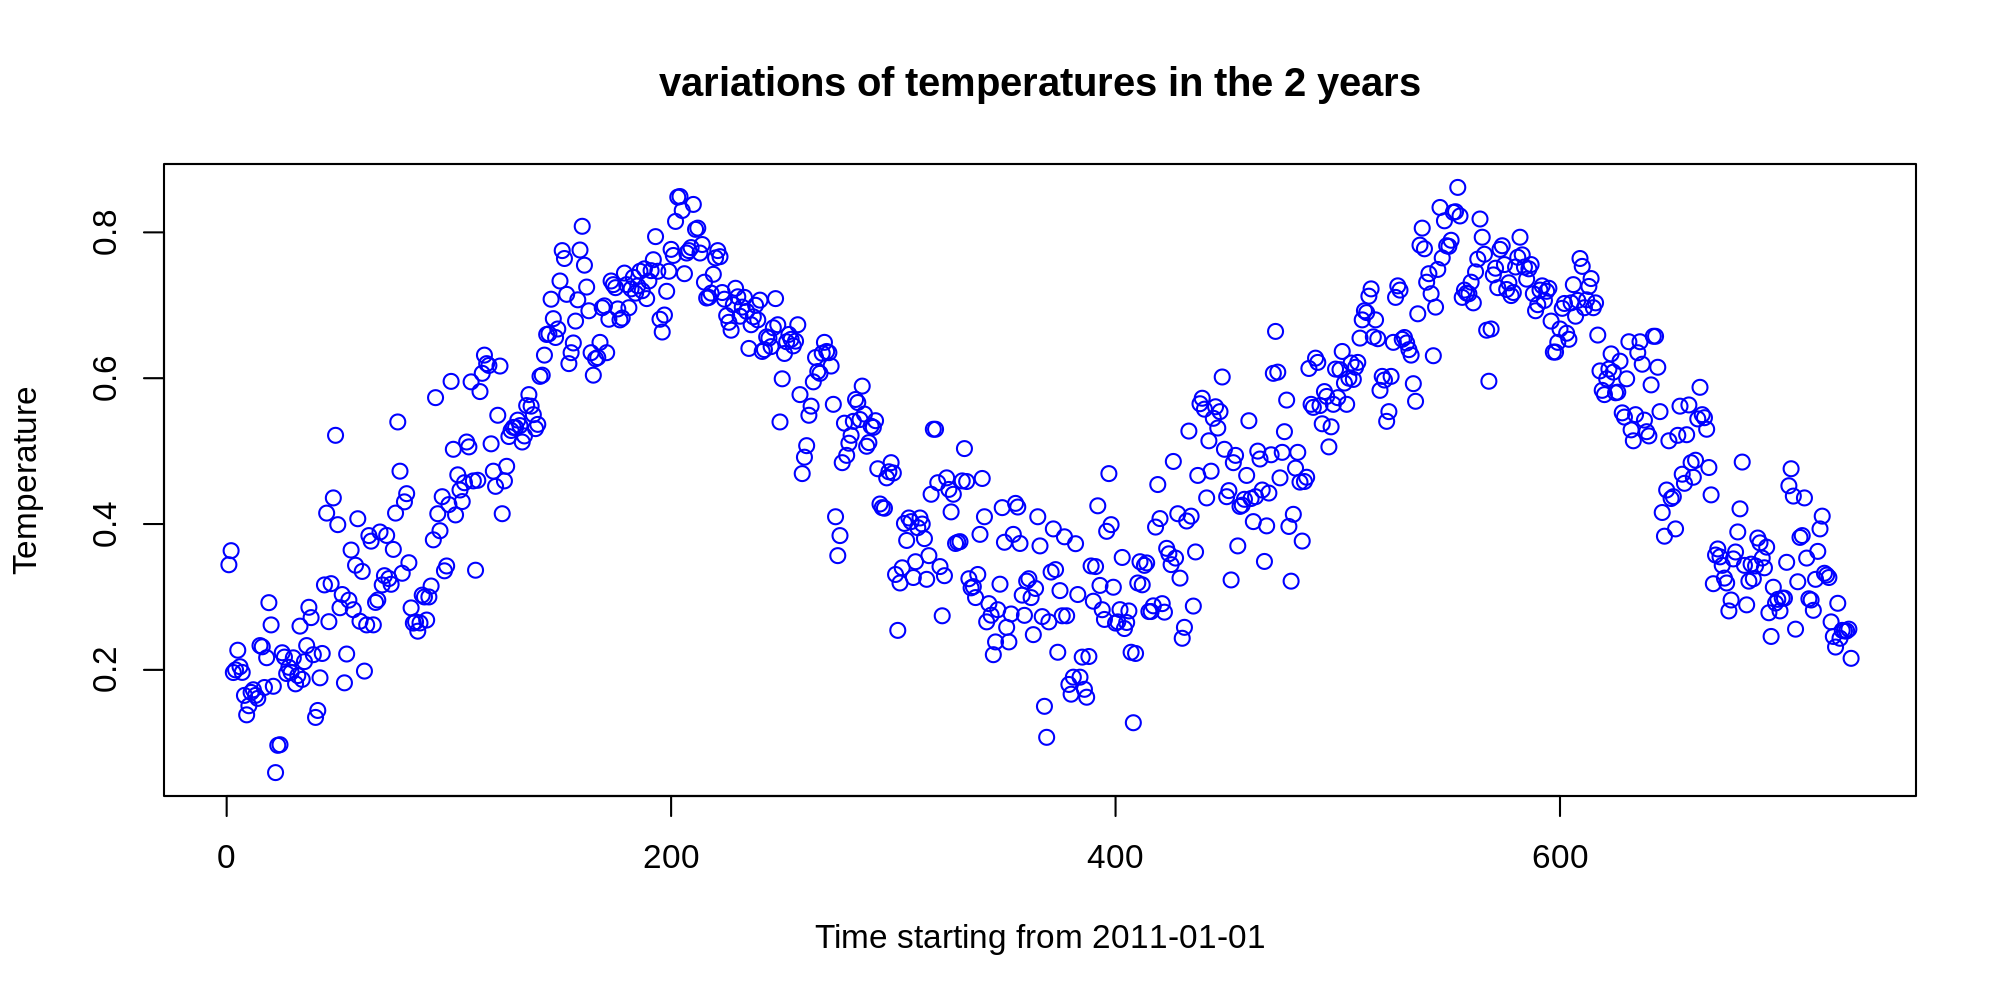

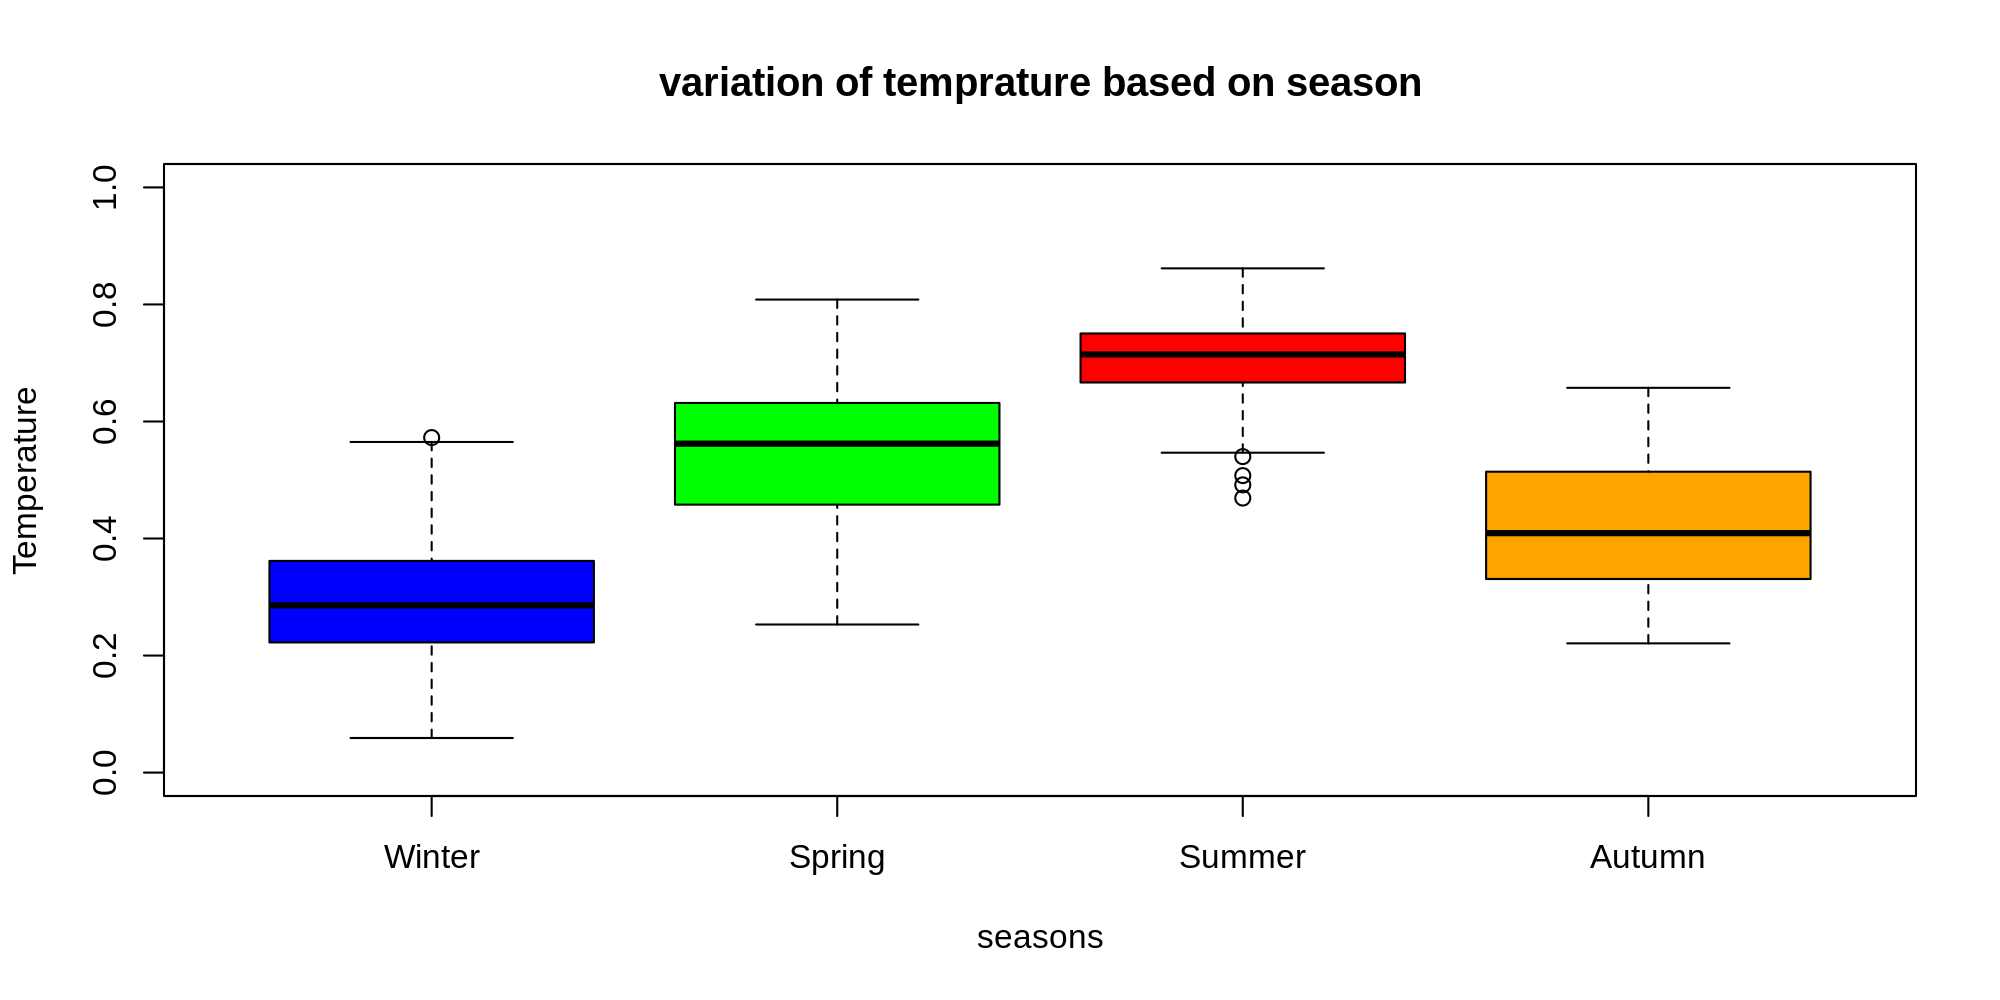

In [ ]:
#how do temp change accros the 2 years 
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot(data_day$temp, main = "variations of temperatures in the 2 years", ylab="Temperature", col="blue", xlab="Time starting from 2011-01-01")
boxplot(data_day$temp~data_day$season,ylim = c(0, 1),main="variation of temprature based on season",ylab="Temperature",xlab = "seasons",names=c("Winter","Spring","Summer","Autumn"), col = c("blue","green", "red", "orange"))

from the plot and the boxplot we notice that the temperature either increases or decreases depending on the season </br> 
in the beginnig it increases from winter through spring until the summer where it reaches its peak after that it decreases through autumn and winter where it reaches its lowest point then incresing from winter to spring</br>
with the new spring the cycle restarts with the new year 


In [ ]:
#mean and median 
mean(data_day$temp)
median(data_day$temp)
mean_list<-aggregate(data_day$temp, list(data_day$season), FUN=mean)
median_list<-aggregate(data_day$temp, list(data_day$season), FUN=median)
seasons<-data.frame(c("Winter","Spring","Summer","Autumn"))
mean_median_season<-cbind(seasons,mean_list[,2],median_list[,2])
names(mean_median_season)<-c("season","mean","median")
mean_median_season

[1] 0.4953848

[1] 0.498333

season mean      median   
1 Winter 0.2977475 0.2858330
2 Spring 0.5444052 0.5620835
3 Summer 0.7063093 0.7145830
4 Autumn 0.4229060 0.4091665

###***mean and median of temperatures accros the 2 years :***
from the summary of our data set or after calculating we can tell that :</br>
mean<sub>temp</sub> = 0.49538 </br> median<sub>temp</sub> = 0.49833</br>

###***mean and median of temperatures of each season accros the 2 years :***
>Winter:</br>
>>mean <sub>temp</sub> = 0.298  </br> median <sub>temp</sub> = 0.286 </br>

>Spring:</br>
>>mean <sub>temp</sub> = 0.544  </br> median <sub>temp</sub> = 0.562 </br>

>Summer:</br>
>>mean <sub>temp</sub> = 0.706  </br> median <sub>temp</sub> = 0.716 </br>

>Autumn:</br>
>>mean <sub>temp</sub> = 0.423  </br> median <sub>temp</sub> = 0.409 </br>

In [ ]:
#correlation between temp atemp mean(temp,atemp) cnt you can use heat matrix 
temp_atemp_mean=(data_day$temp+data_day$atemp)/2
test_cor_data_frame=data.frame(temp_atemp_mean=temp_atemp_mean,temp=data_day$temp,atemp=data_day$atemp,cnt=data_day$cnt)
cor(test_cor_data_frame)

temp_atemp_mean temp      atemp     cnt      
temp_atemp_mean 1.0000000       0.9981576 0.9976748 0.6304811
temp            0.9981576       1.0000000 0.9917016 0.6274940
atemp           0.9976748       0.9917016 1.0000000 0.6310657
cnt             0.6304811       0.6274940 0.6310657 1.0000000

###***Correlation temp atemp mean.temp.atemp cnt:***
based on this correlation matrix we can :</br>
* tell that there's a strong almost perfect correlation between temp and atemp , and it's logical to say that there is a causality between the two 
* the coeffeicient  between temp and cnt , atemp and cnt , mean.temp.atemp and cnt are all approximate to 0.63 which leads to say that there's a good possibility for a correlation between the temerature and the total count of bike rental 


### ***Mean of temperature humidity windspeed and bike rental count per month:***


In [ ]:
#mean of temp hum windspeed cnt per month 
mean_temp<-aggregate(data_day$temp, list(data_day$mnth), FUN=mean)
mean_hum<-aggregate(data_day$hum, list(data_day$mnth), FUN=mean)
mean_windspeed<-aggregate(data_day$windspeed, list(data_day$mnth), FUN=mean)
mean_cnt<-aggregate(data_day$cnt, list(data_day$mnth), FUN=mean)
month<-data.frame(c("JAN","FRB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC"))
mean_per_month<-cbind(month,mean_temp[,2],mean_hum[,2],mean_windspeed[,2],mean_cnt[,2])
names(mean_per_month)<-c("month","temperature","humidity","windspeed","bike_count")
mean_per_month

month temperature humidity  windspeed bike_count
1  JAN   0.2364439   0.5858283 0.2063028 2176.339  
2  FRB   0.2992264   0.5674647 0.2156839 2655.298  
3  MAR   0.3905388   0.5884750 0.2226994 3692.258  
4  APR   0.4699988   0.5880631 0.2344822 4484.900  
5  MAI   0.5947984   0.6889583 0.1829889 5349.774  
6  JUN   0.6840972   0.5758055 0.1854199 5772.367  
7  JUL   0.7554704   0.5978763 0.1660588 5563.677  
8  AUG   0.7085816   0.6377301 0.1729181 5664.419  
9  SEP   0.6164850   0.7147144 0.1659451 5766.517  
10 OCT   0.4850122   0.6937609 0.1752055 5199.226  
11 NOV   0.3692198   0.6248765 0.1838014 4247.183  
12 DEC   0.3240310   0.6660405 0.1766089 3403.806

In [ ]:
#calculating the correlation between temperature and registered useres ,temperature and casual users
cor(data_day$casual,data_day$temp)
cor(data_day$registered,data_day$temp) 


[1] 0.5432847

[1] 0.540012

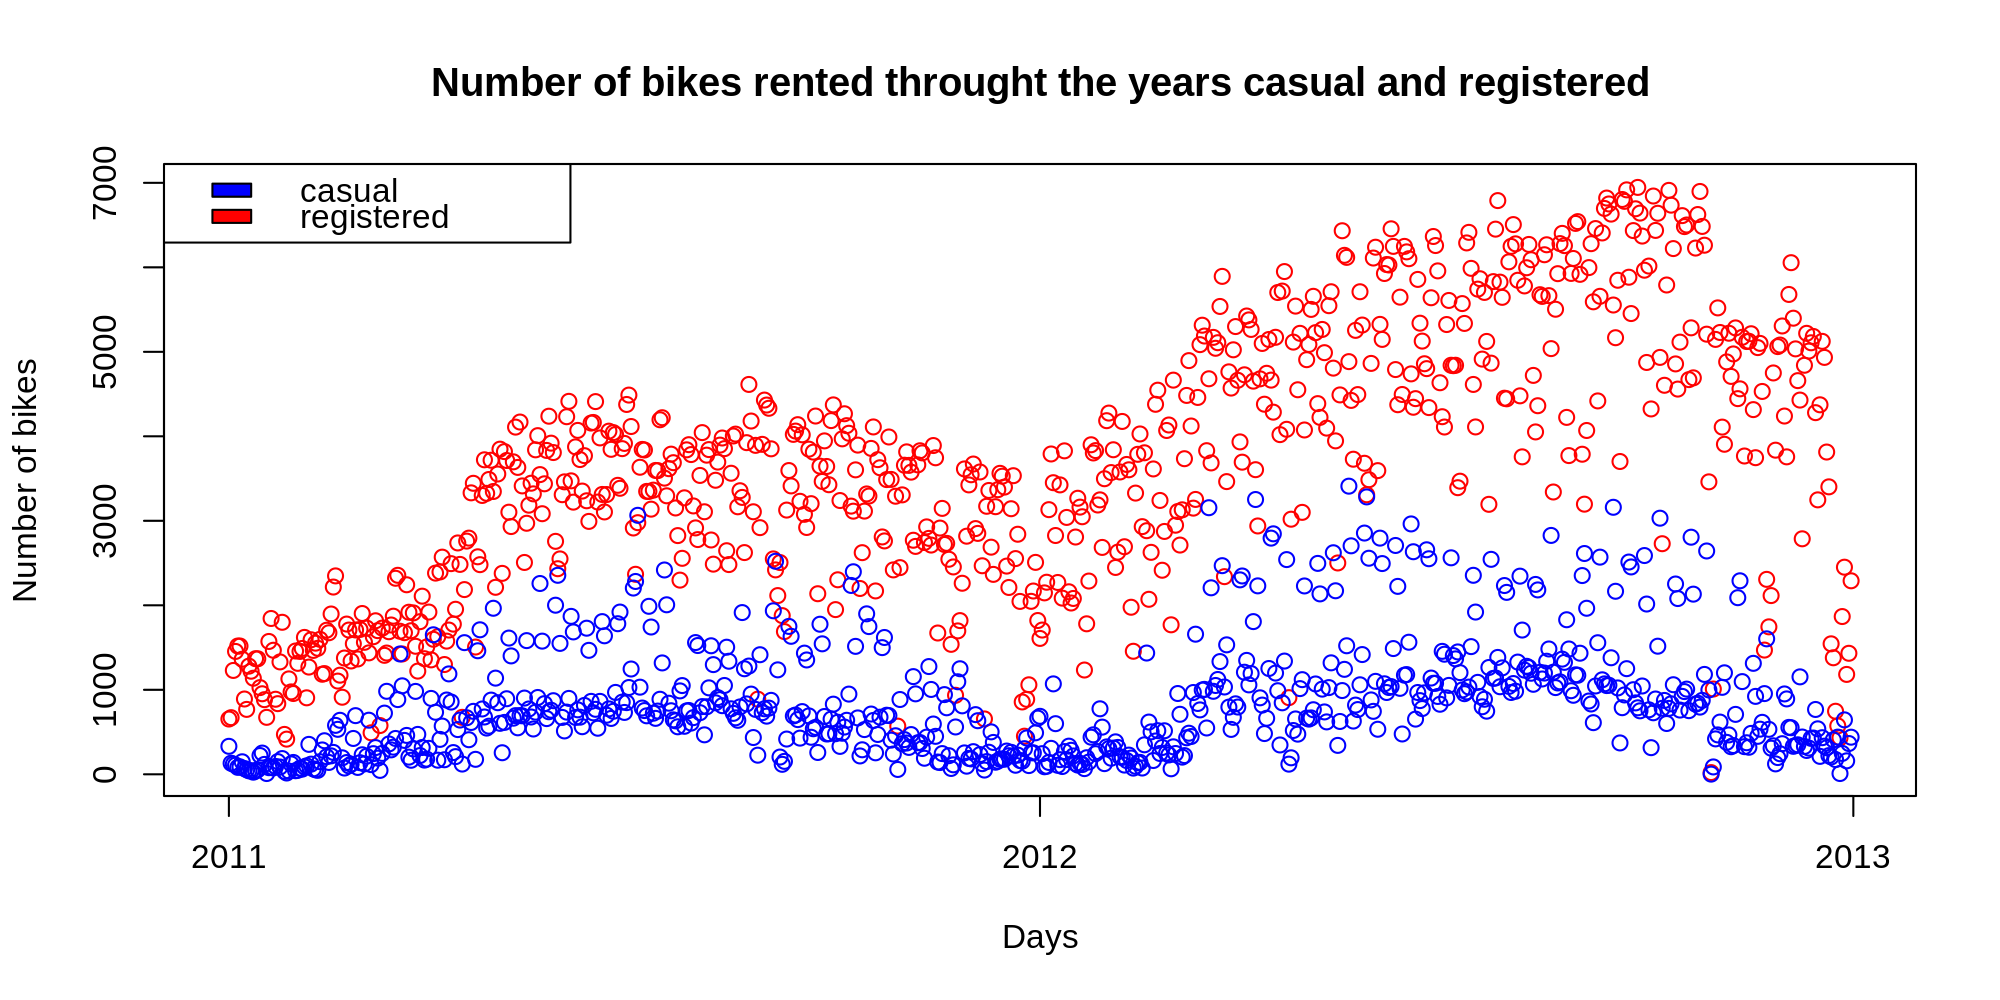

In [ ]:
#plotting casual and registered rentals throught the years
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot(as.Date(data_day$dteday),data_day$registered,col="red",ylab="Number of bikes",xlab = "Days" ,main="Number of bikes rented throught the years casual and registered")
points(as.Date(data_day$dteday),data_day$casual,col="blue")
legend(x="topleft",legend = c("casual","registered"),fill =c("blue","red"))

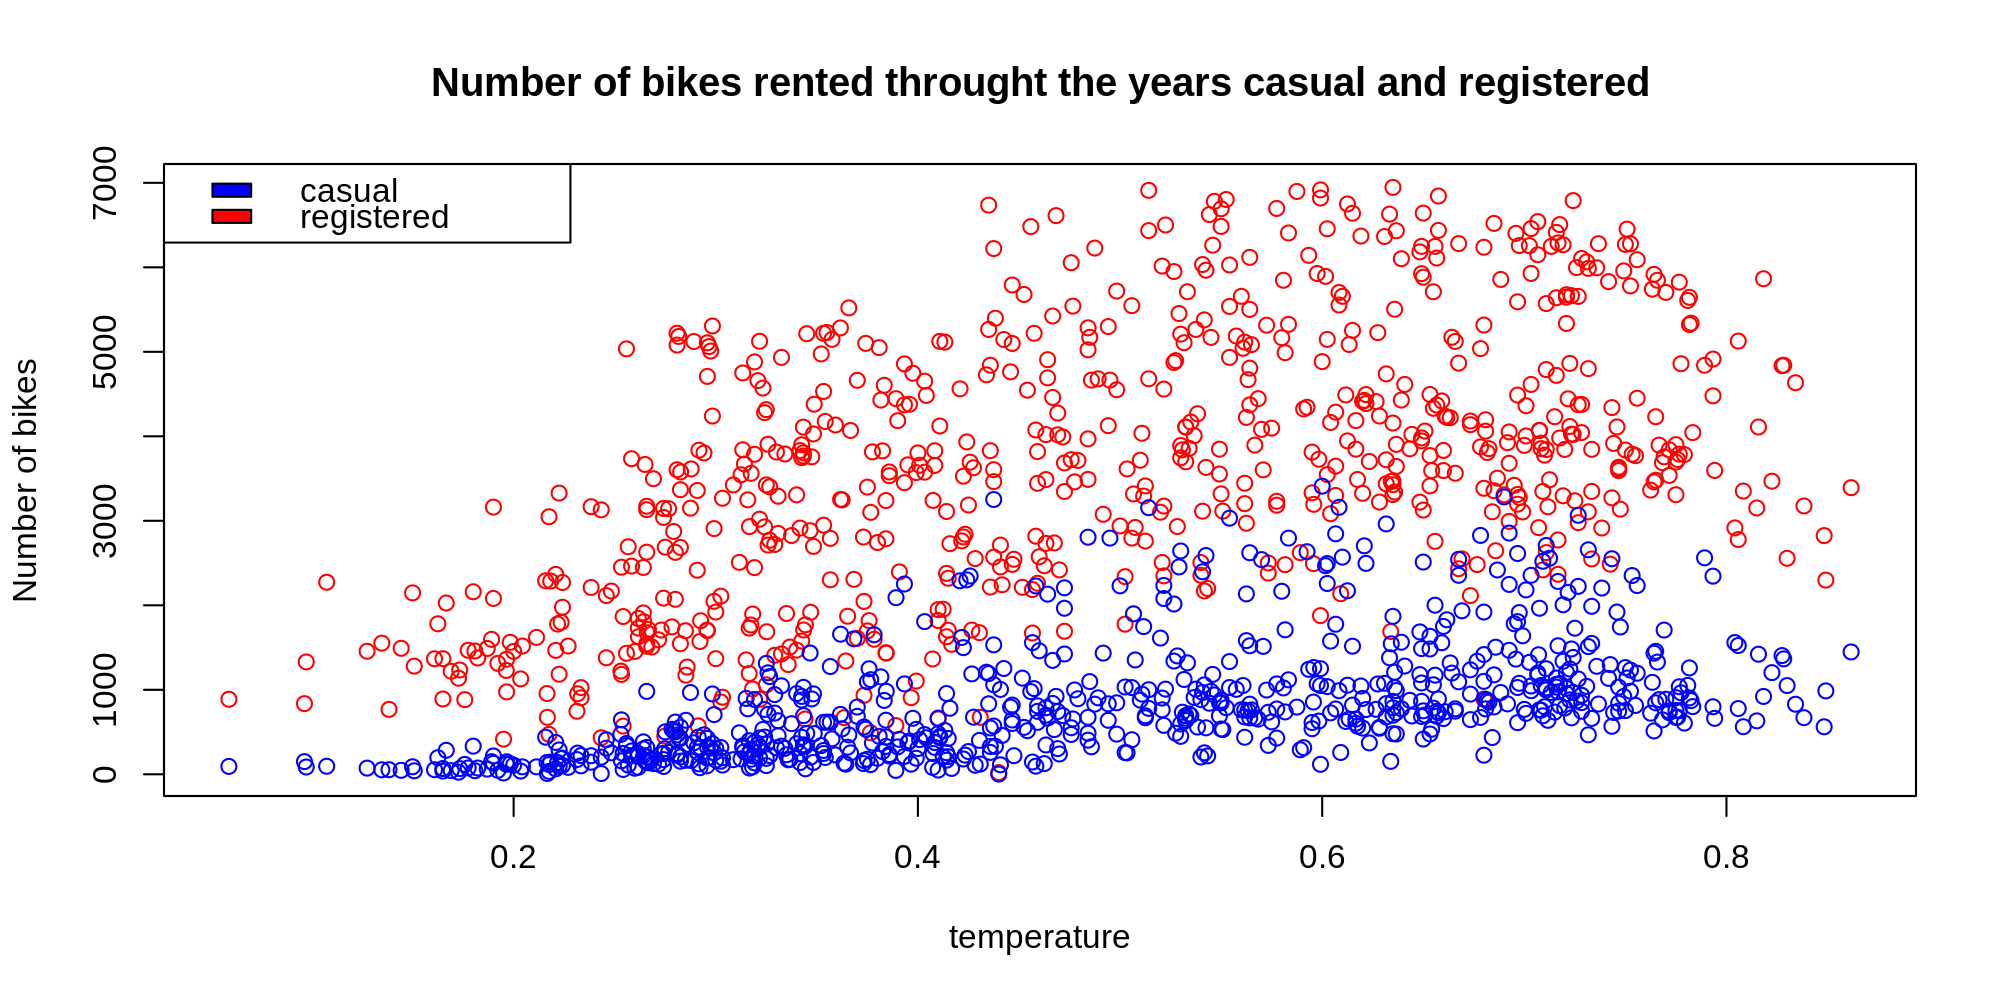

In [ ]:
#plotting casual and registered rentals based on the temperatures
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot(data_day$temp,data_day$registered,col="red",ylab="Number of bikes",xlab = "temperature" ,main="Number of bikes rented throught the years casual and registered")
points(data_day$temp,data_day$casual,col="blue")
legend(x="topleft",legend = c("casual","registered"),fill =c("blue","red"))

###***the association between temperatures and bike rentals casual and registered:***
previously we established that there's a correlation between temperatures and bike rental count with a coeffeicient of approximatly 0.63 </br> After calculating the coeifficient of temperatures with both casual and registeres separately we can say that there's a weaker correlation of 0.54 but it's approximatly the same for both of registered and casual</br> 
From the previous plots we can tell that the number of rented bikes both registered and casual increase during hotter days of summer and spring decrease during the cold days of winter and autumn , and we can tell also that the number of registered bikes rental is always greater then casual rentals 

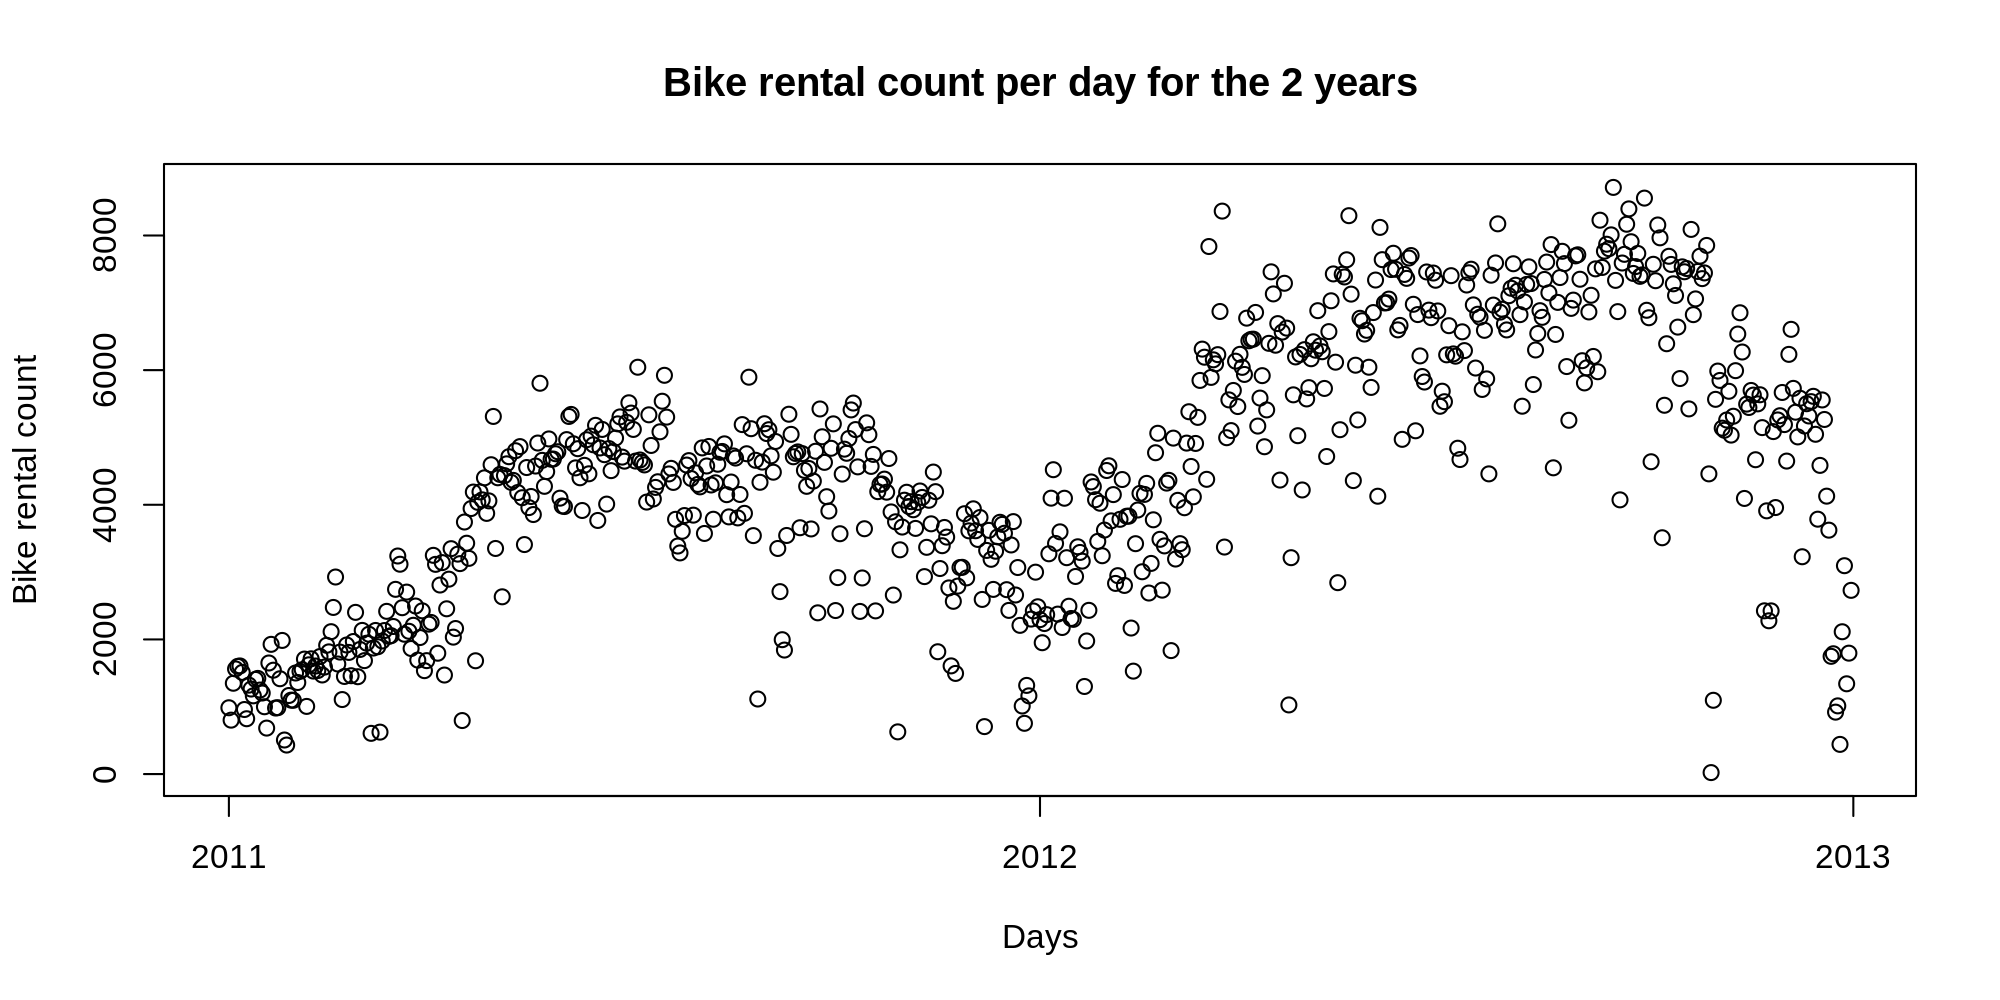

In [ ]:
#plotting cnt vs dteday
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot(as.Date(data_day$dteday),data_day$cnt,main="Bike rental count per day for the 2 years" ,ylab="Bike rental count",xlab="Days")

###***Cnt vs dteday examination:***
As mentioned before we note that during the hot periodes of the year the count of bike rental increases </br>
furthermore from this double bell shaped plot we can see that during 2012 bike rental reached it's peak 

the outliners : 1027 2843 3510 22 1096 



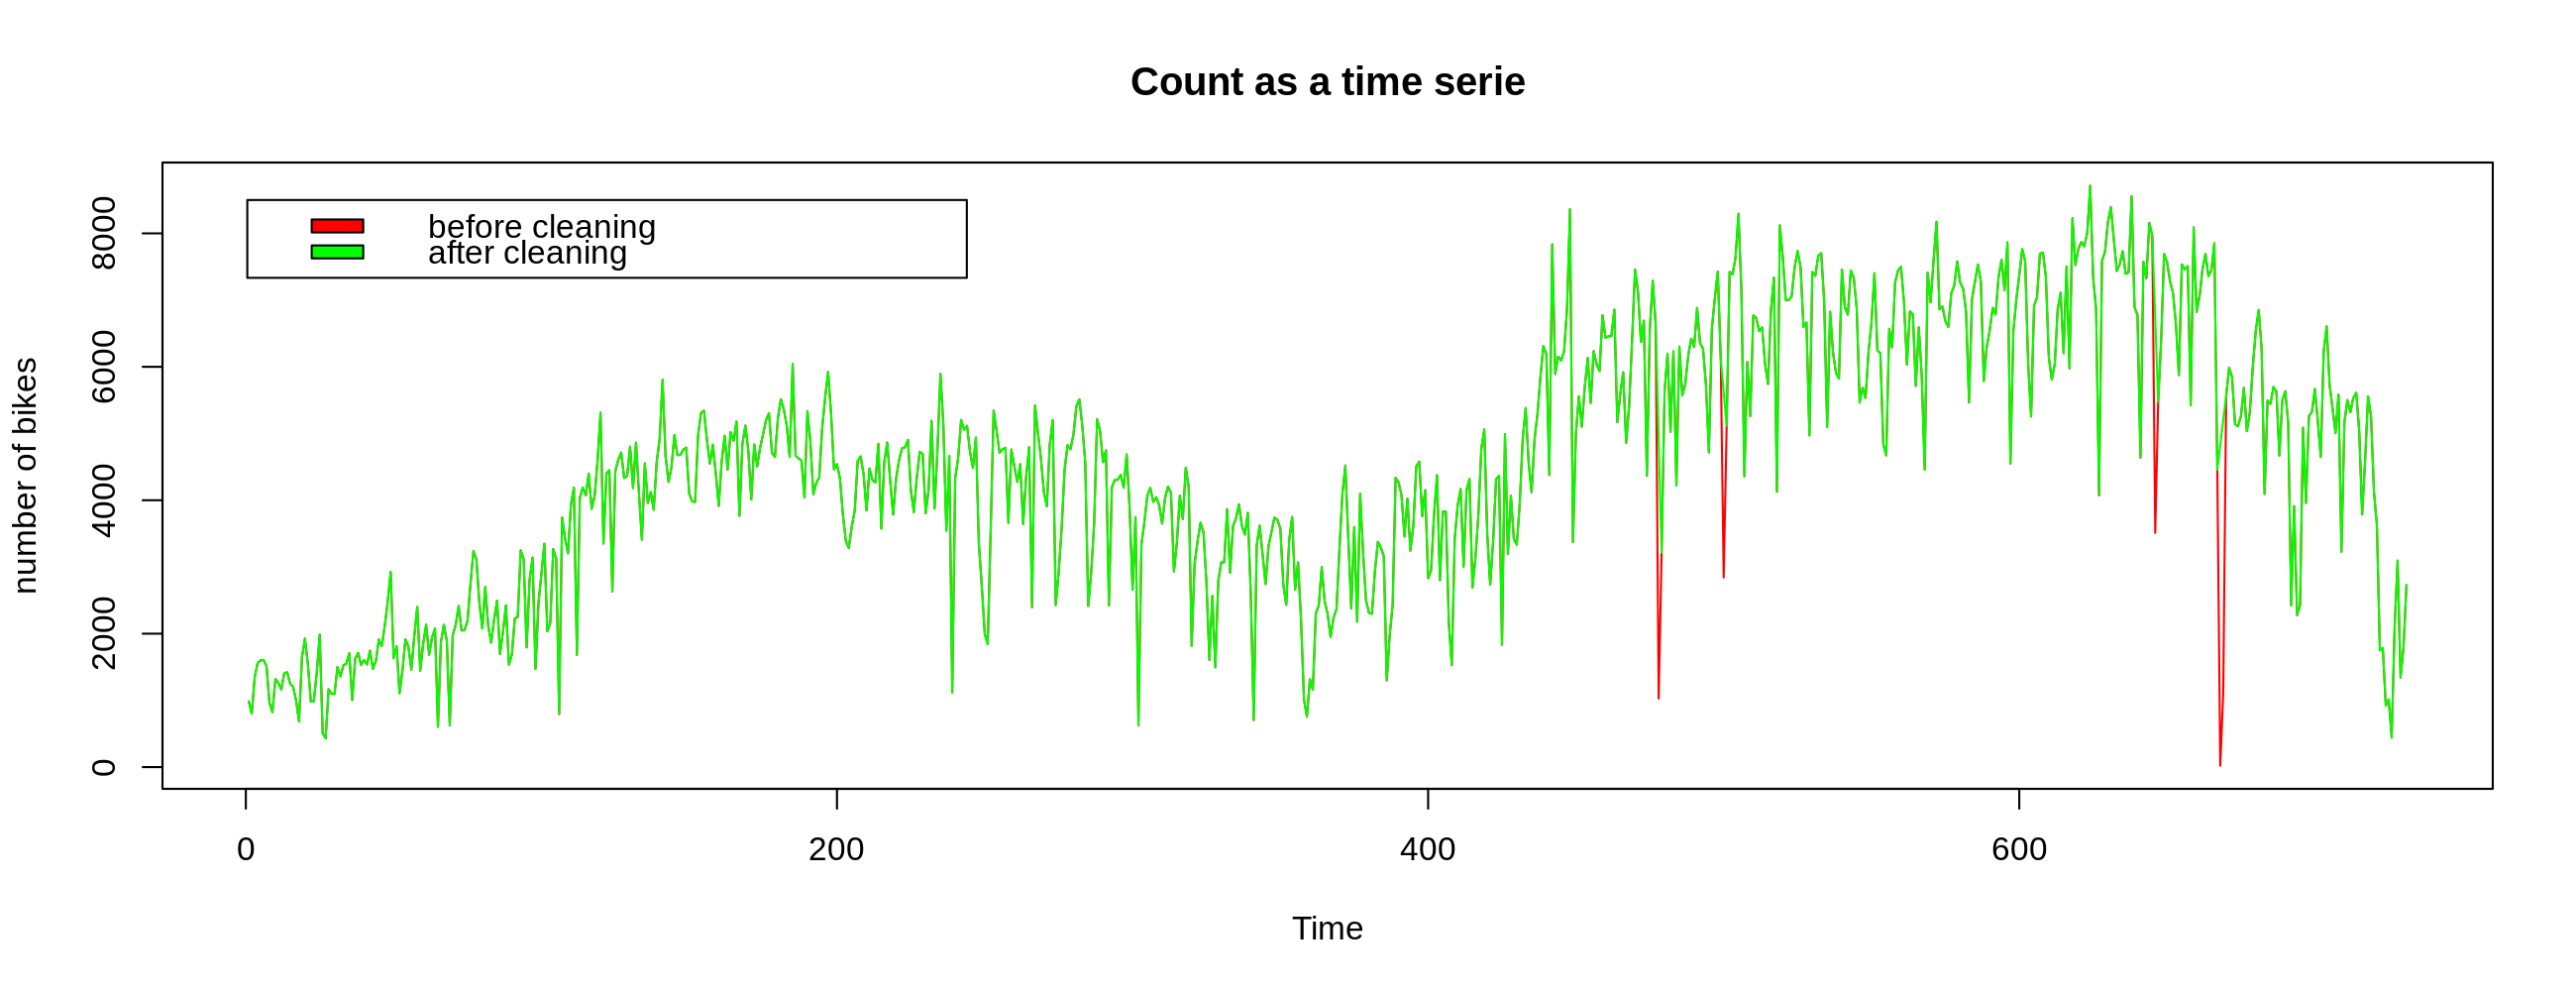

In [ ]:
#cleaning outliers using tsclean()

TS_count_uncleaned<-ts(data_day$cnt) #creating a times serie for cnt based on day need to work on the labling of x axis
TS_count<-tsclean(TS_count_uncleaned) #getting rid of outliners and this is my time series
outliners<-TS_count_uncleaned[TS_count_uncleaned!=TS_count] #just like series in python we see what were the outliners values
cat("the outliners :",outliners,"\n\n")

options(repr.plot.width = 13, repr.plot.height = 5, repr.plot.res = 200)
plot(TS_count_uncleaned,main="Count as a time serie",ylab="number of bikes" ,col="red")
lines(TS_count,col="green")
legend(0.5,8500,legend = c("before cleaning","after cleaning"),fill =c("red","green"))

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = TS_count, beta = TRUE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.2264376
 beta : TRUE
 gamma: FALSE

Coefficients:
       [,1]
a 2795.7087
b  726.7248

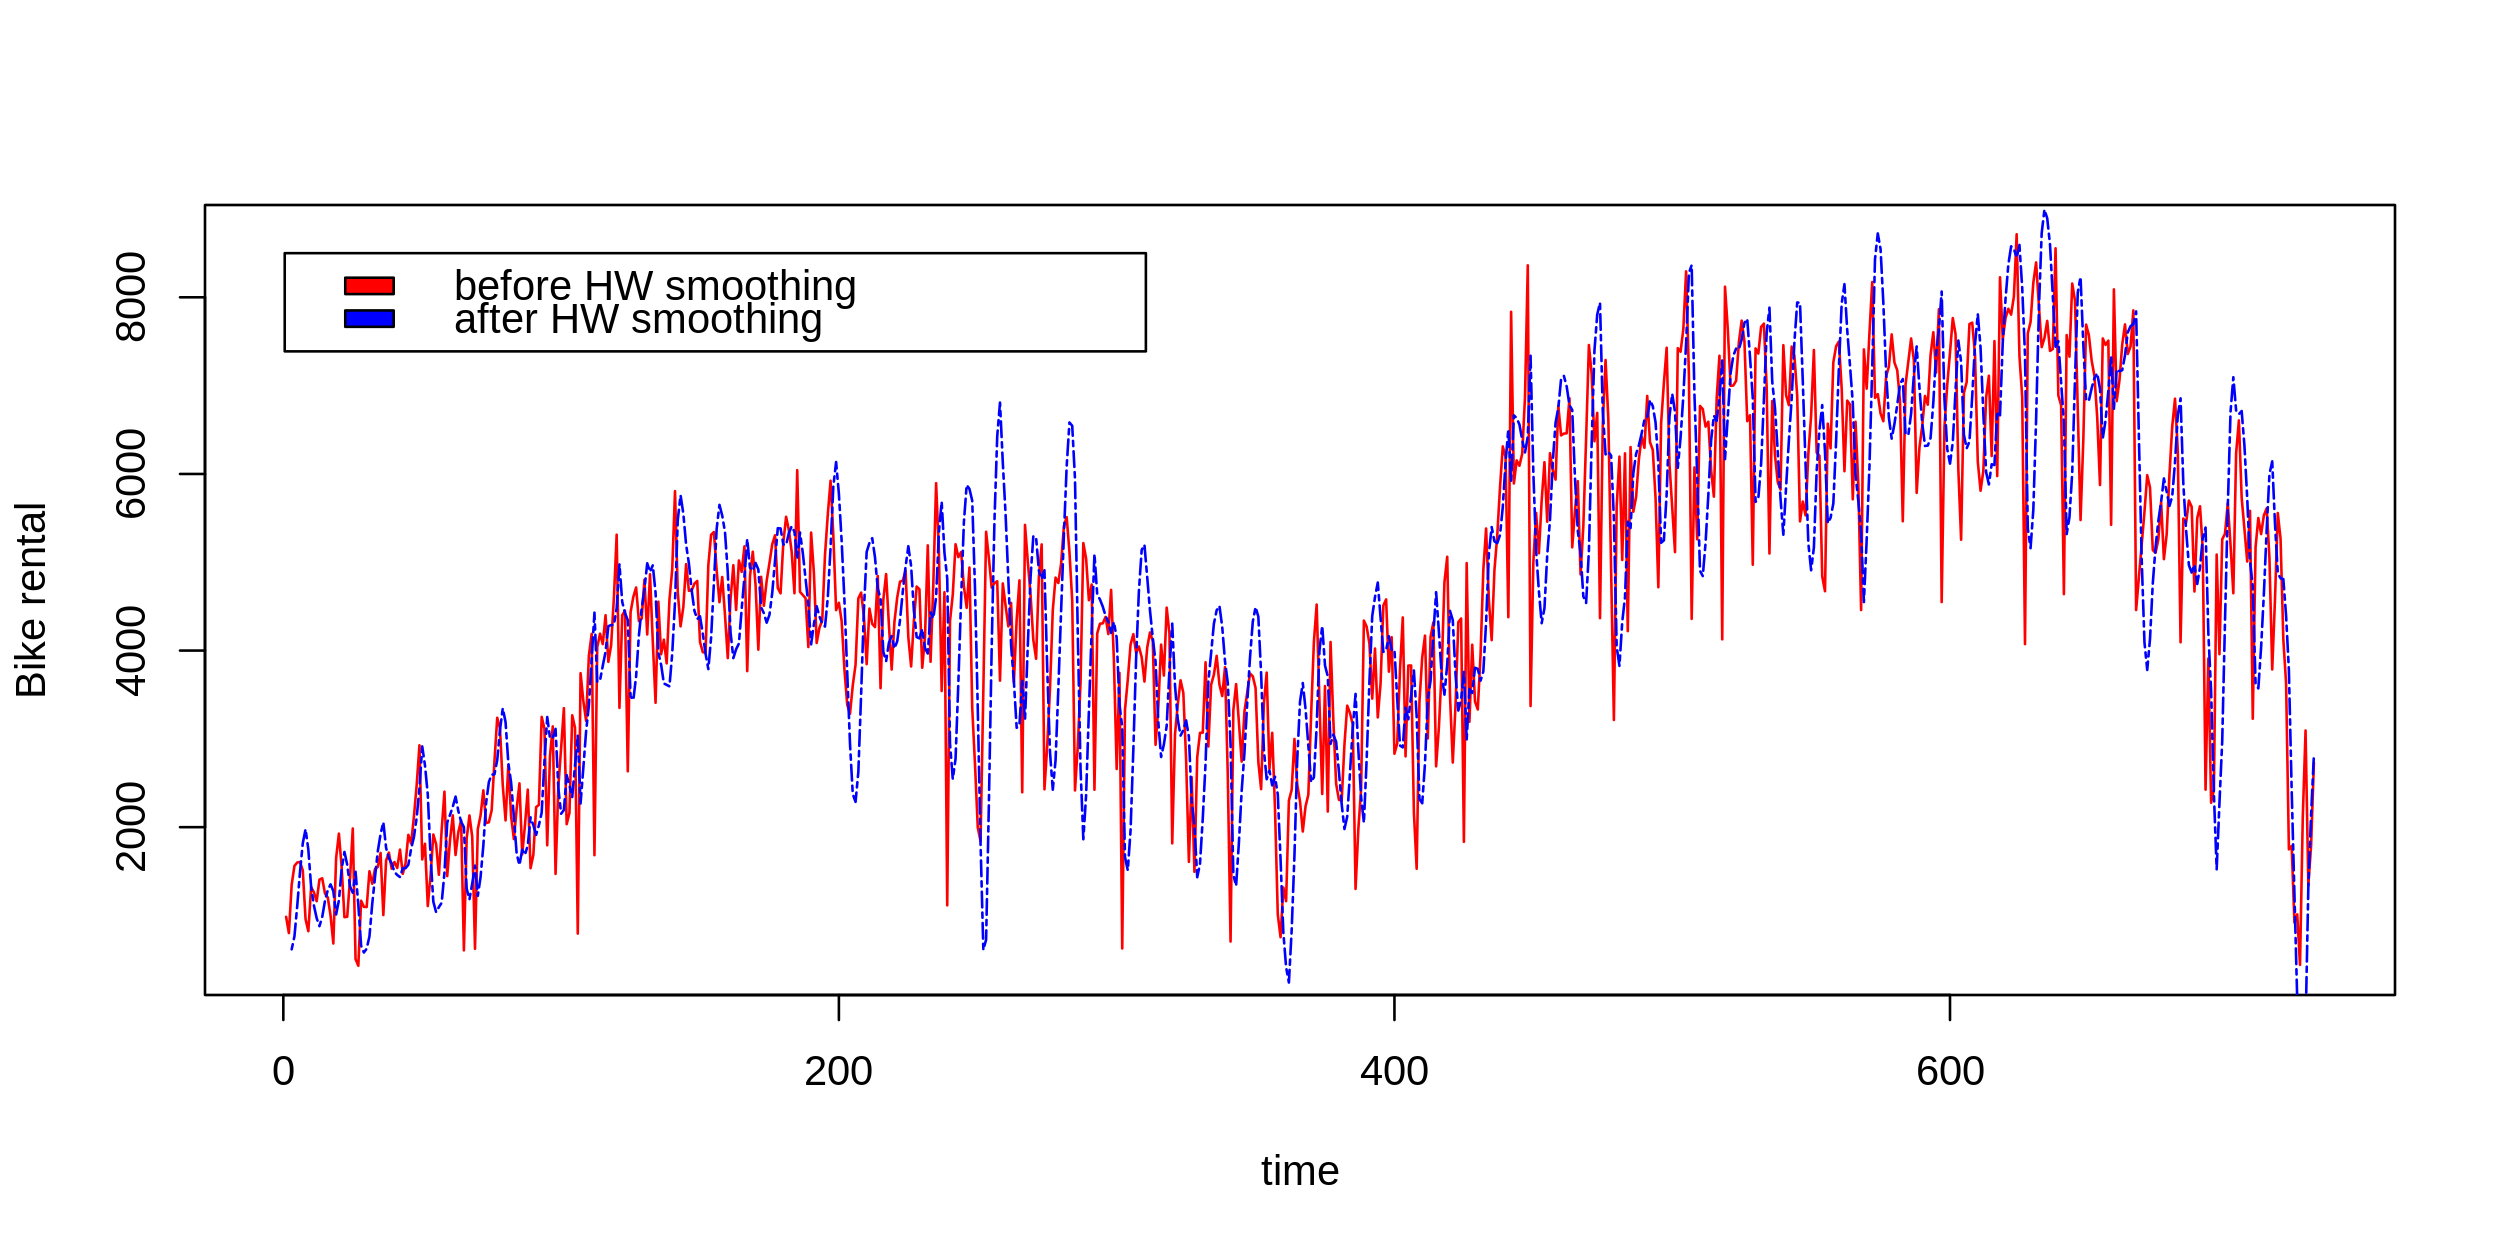

In [ ]:
#smoothing the time serie using holt winter
TS_count_smooth_hw=HoltWinters(TS_count, beta=TRUE, gamma=FALSE)
TS_count_smooth_hw
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 250)
#plot(TS_count_smooth_hw)
plot(TS_count, ylab="Bike rental",col="red",xlab="time")
lines(TS_count_smooth_hw$fitted[,1], lty=6, col="blue")
legend(0.5,8500,legend = c("before HW smoothing","after HW smoothing"),fill =c("red","blue"))


We used holt-winter's exponential smoothing because our time series exhibits a trend and seasonality however since we haven't specified the frequency we can't take the seasonality we noticed into consideration 

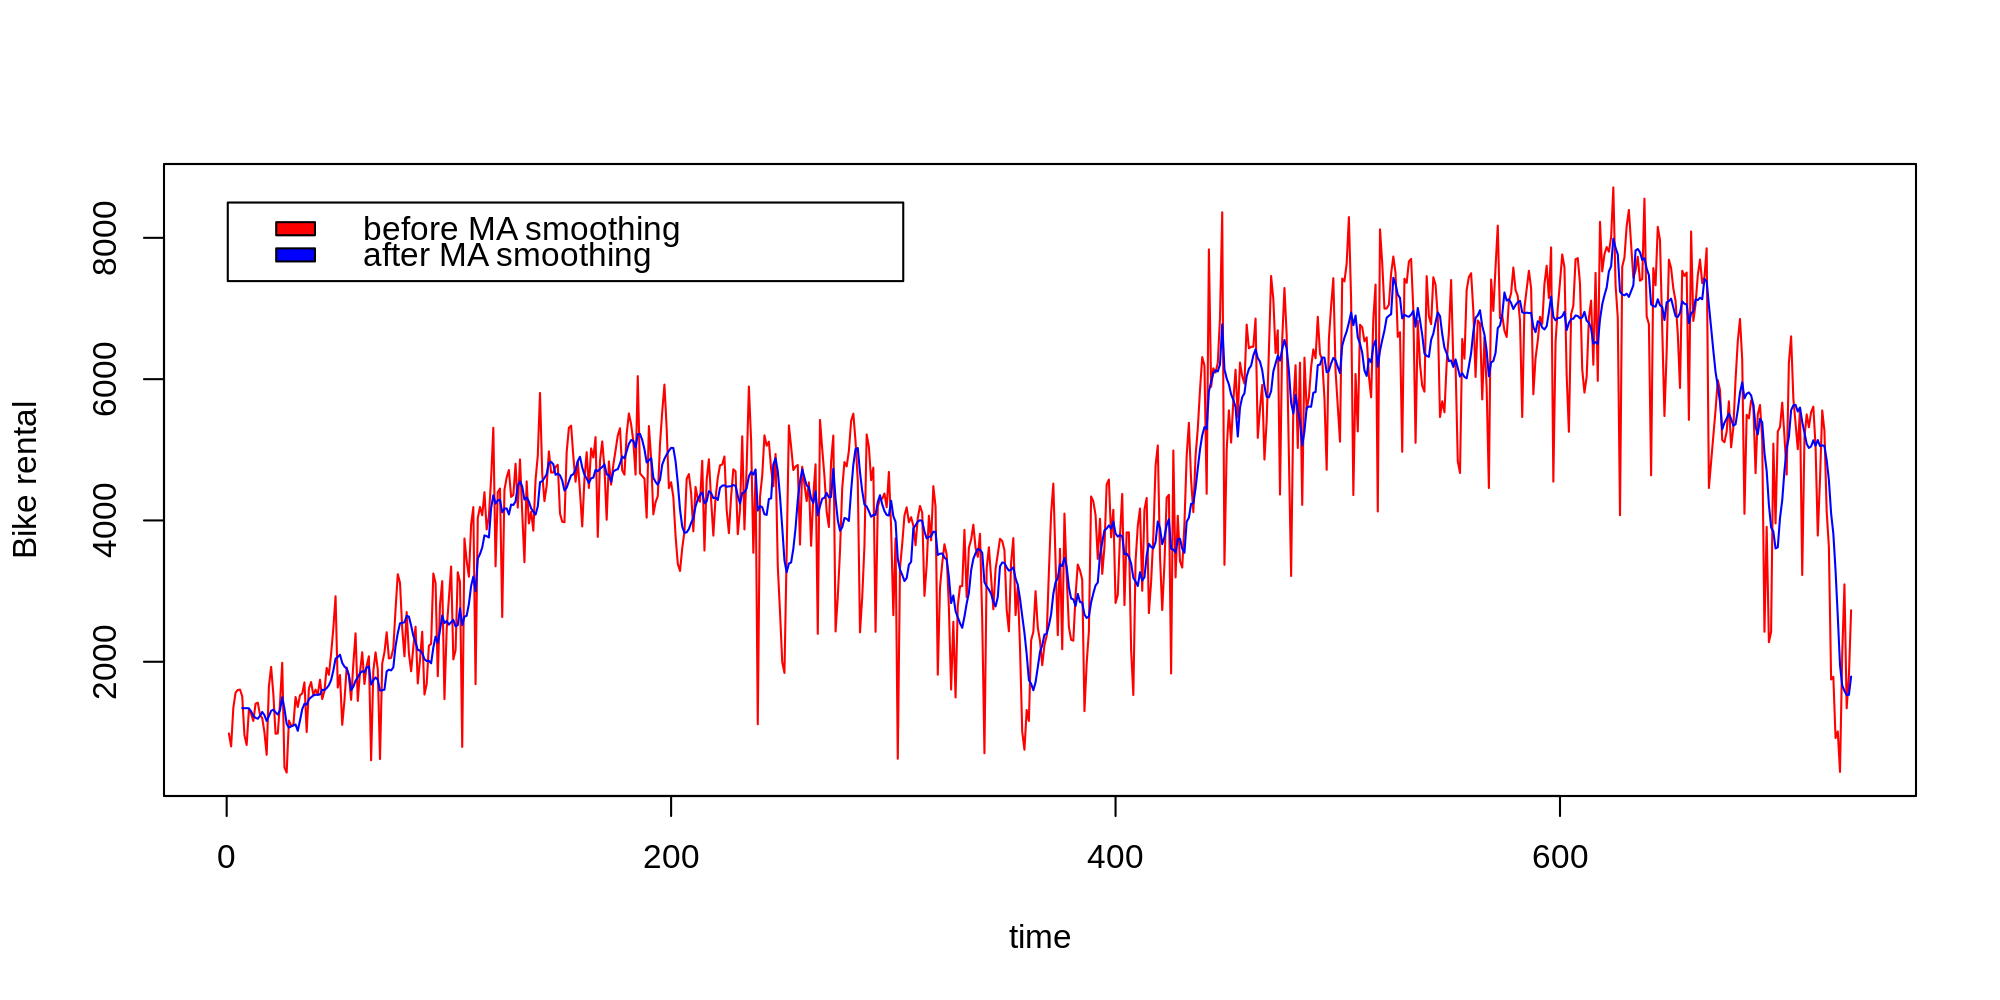

In [ ]:
#smoothing with simple moving avrage of order 7 the last week is used for the calculating the mean 
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
TS_count_smooth_ma_10=SMA(TS_count,n=7)
#plot(TS_count_smooth_ma_10, col="blue")
plot(TS_count, ylab="Bike rental",col="red",xlab="time")
lines(TS_count_smooth_ma_10, lty=1, col="blue")
legend(0.5,8500,legend = c("before MA smoothing","after MA smoothing"),fill =c("red","blue"))



The moving average here is not usefull here because it's mostlikely that our data is not stationary 


###***comparing the smoothed time serie with the original:***
- when comapring the original and the smoothed using moving average we notice that the smoothed time serie has less fluctuation , this time serie would be helpful when studying the trend and its direction but not very accurate when it comes to forcasting because with this smoothing method we lost a lot of information on seasonal and the irregular componants 
- when comparing the original and the smoothed using holt winter's expo smoothing we notice that the smoothed time  series is almost similar to the original one in terms of seasonality trend and behaviour but overall with less fluctuations , The three aspects of the time series behavior value, trend, and seasonality are expressed as three types of exponential smoothing


#***2-***

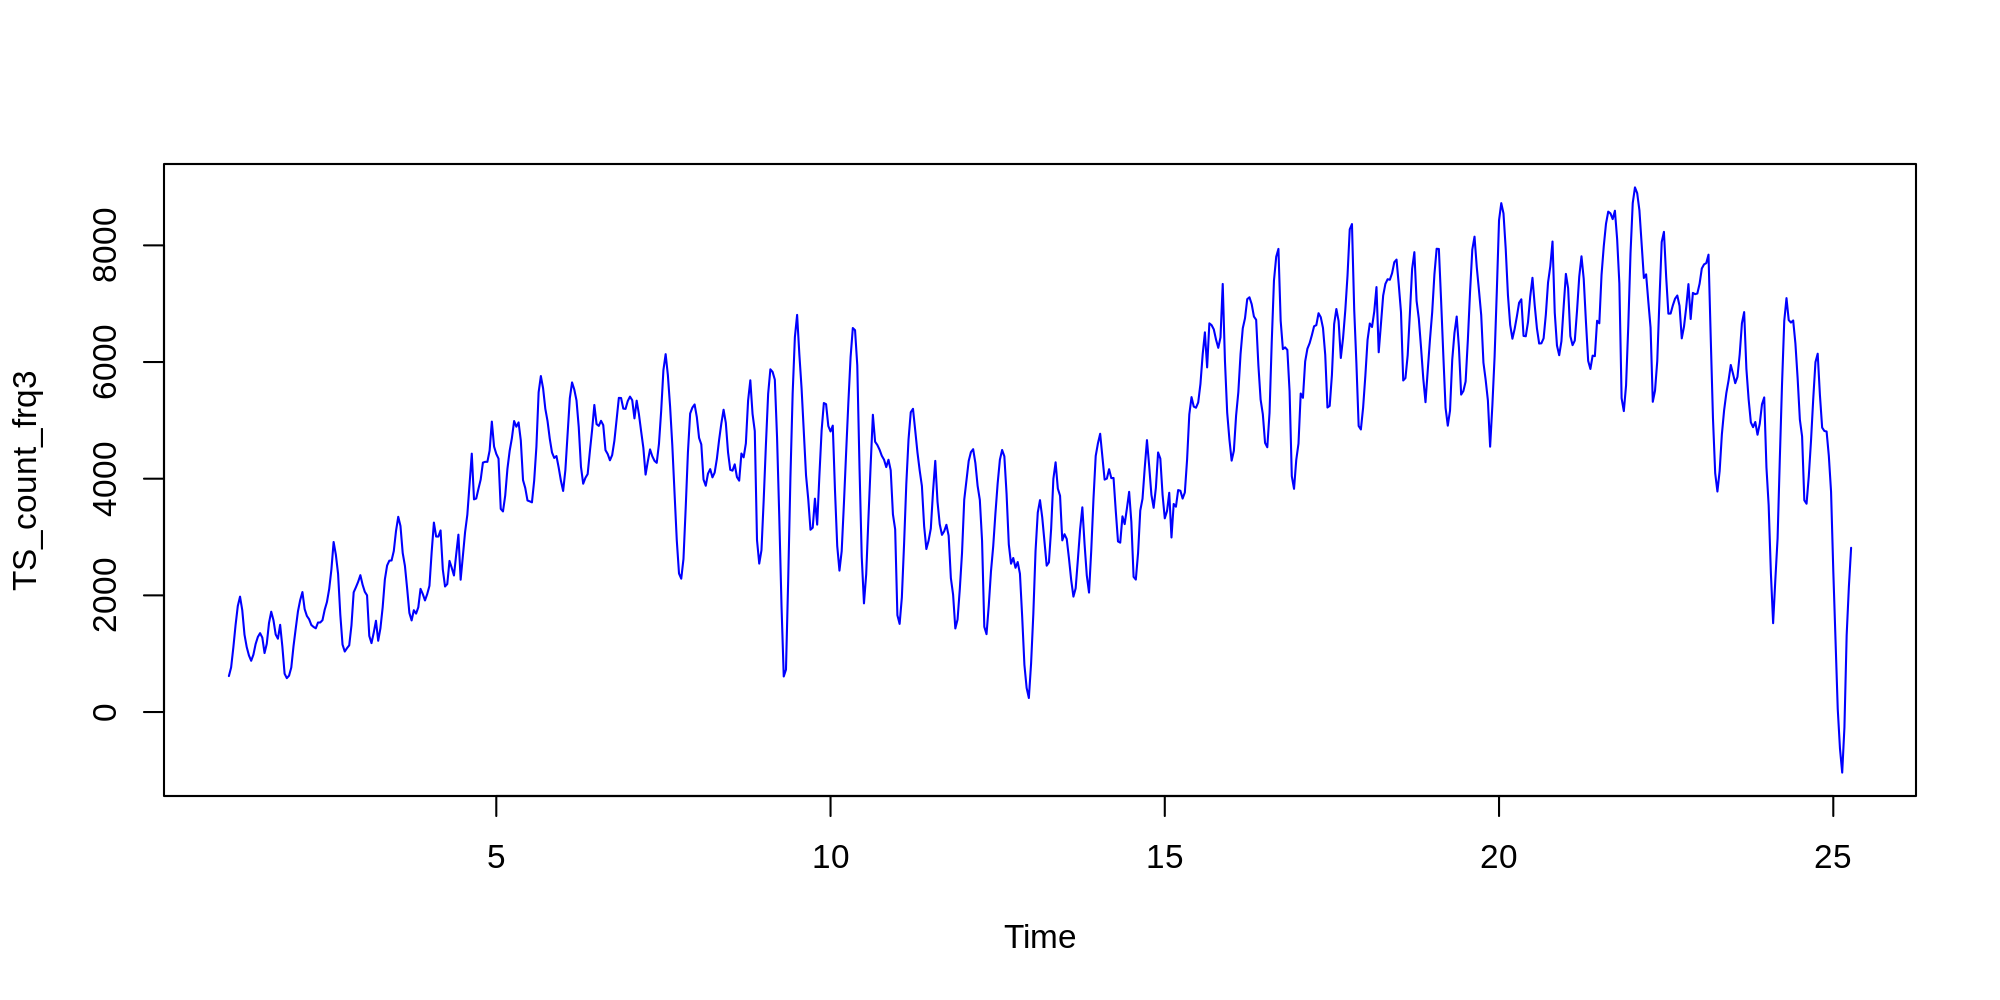

In [ ]:
# we are going to continue using the fitted time series resulting from holt winter's smoothing 
#adding the right frequency 
# at first we took the smoothed one for question 4 however we change our minds because the results were illogical 
# we used the smoothed time serie only in question 3

TS_count_ft_hw<-TS_count_smooth_hw$fitted[,1]
TS_count_frq3=ts(TS_count_ft_hw, frequency = 30)# this is used for question 3
TS_count_frq<- ts(TS_count, frequency = 30)# this is used for question 4
plot(TS_count_frq3, col="blue")

###***The reason for choosing a frequency of 30:*** 
we chose to add a frequency of 30 (to be more precise 30.4375) equivalant to a one month because after many tries( we tried 365 for a yearly cycle and 365/4 for a seasonal cycle) and analysis of the decomposed times series we found that taking by month is the moste suitable because we noticed that there are some fluctuations which repeats every monthly cycle

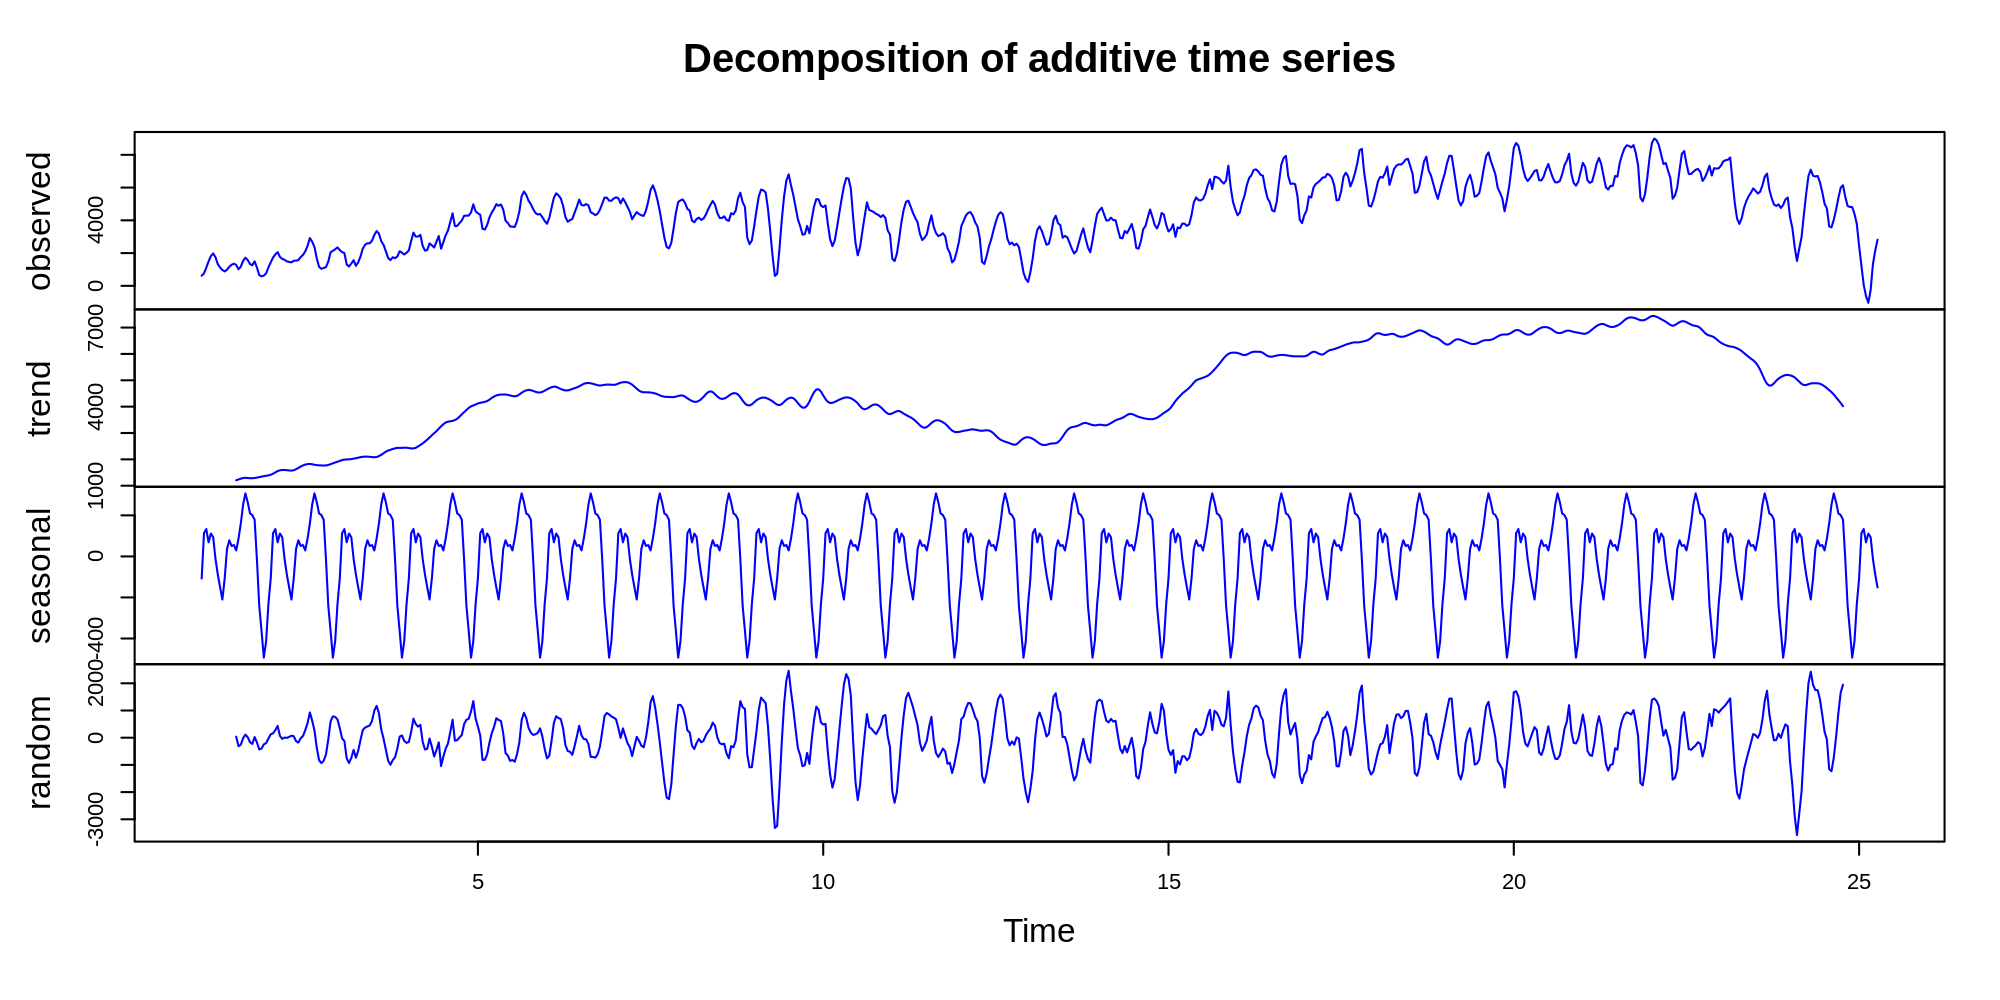

In [ ]:
#checking if we can use arima model by checking for stationarity and seasonality 
#we start by decomposing the time series
TS_count_frq_decomp <- decompose(TS_count_frq3) #
plot(TS_count_frq_decomp, col="blue") 

###***Observations:***

- The seasonal component confirms that we made the correct choice , and displays an interesting seasonal monthly cycle
- The time serie has a seasonal component , we can say that it has a seasonality of 30 day frequency a cycle that repeats each month
- since there is a trend we can assume that our time serie is not staionary the avg of bike rental count changes every day sometimes it increases sometimes it decreases , which is logical because of the fact that bike rental attracts more clients (the increase) , the decrease is probably due to the apparition of some competition perhaps  

#***3-Studying the possibility of medeling using ARIMA for the smoothed time series:***
from the work done so far we concluded that seasonality is present in our time series however we only made an assumption on the stationarity based on the presence of a trend </br>
if we ignore the previously mentioned assumption we can accept MA AR and ARMA as candidate models However we will probably be using ARIMA in the end 


###***Checking for stationarity;***

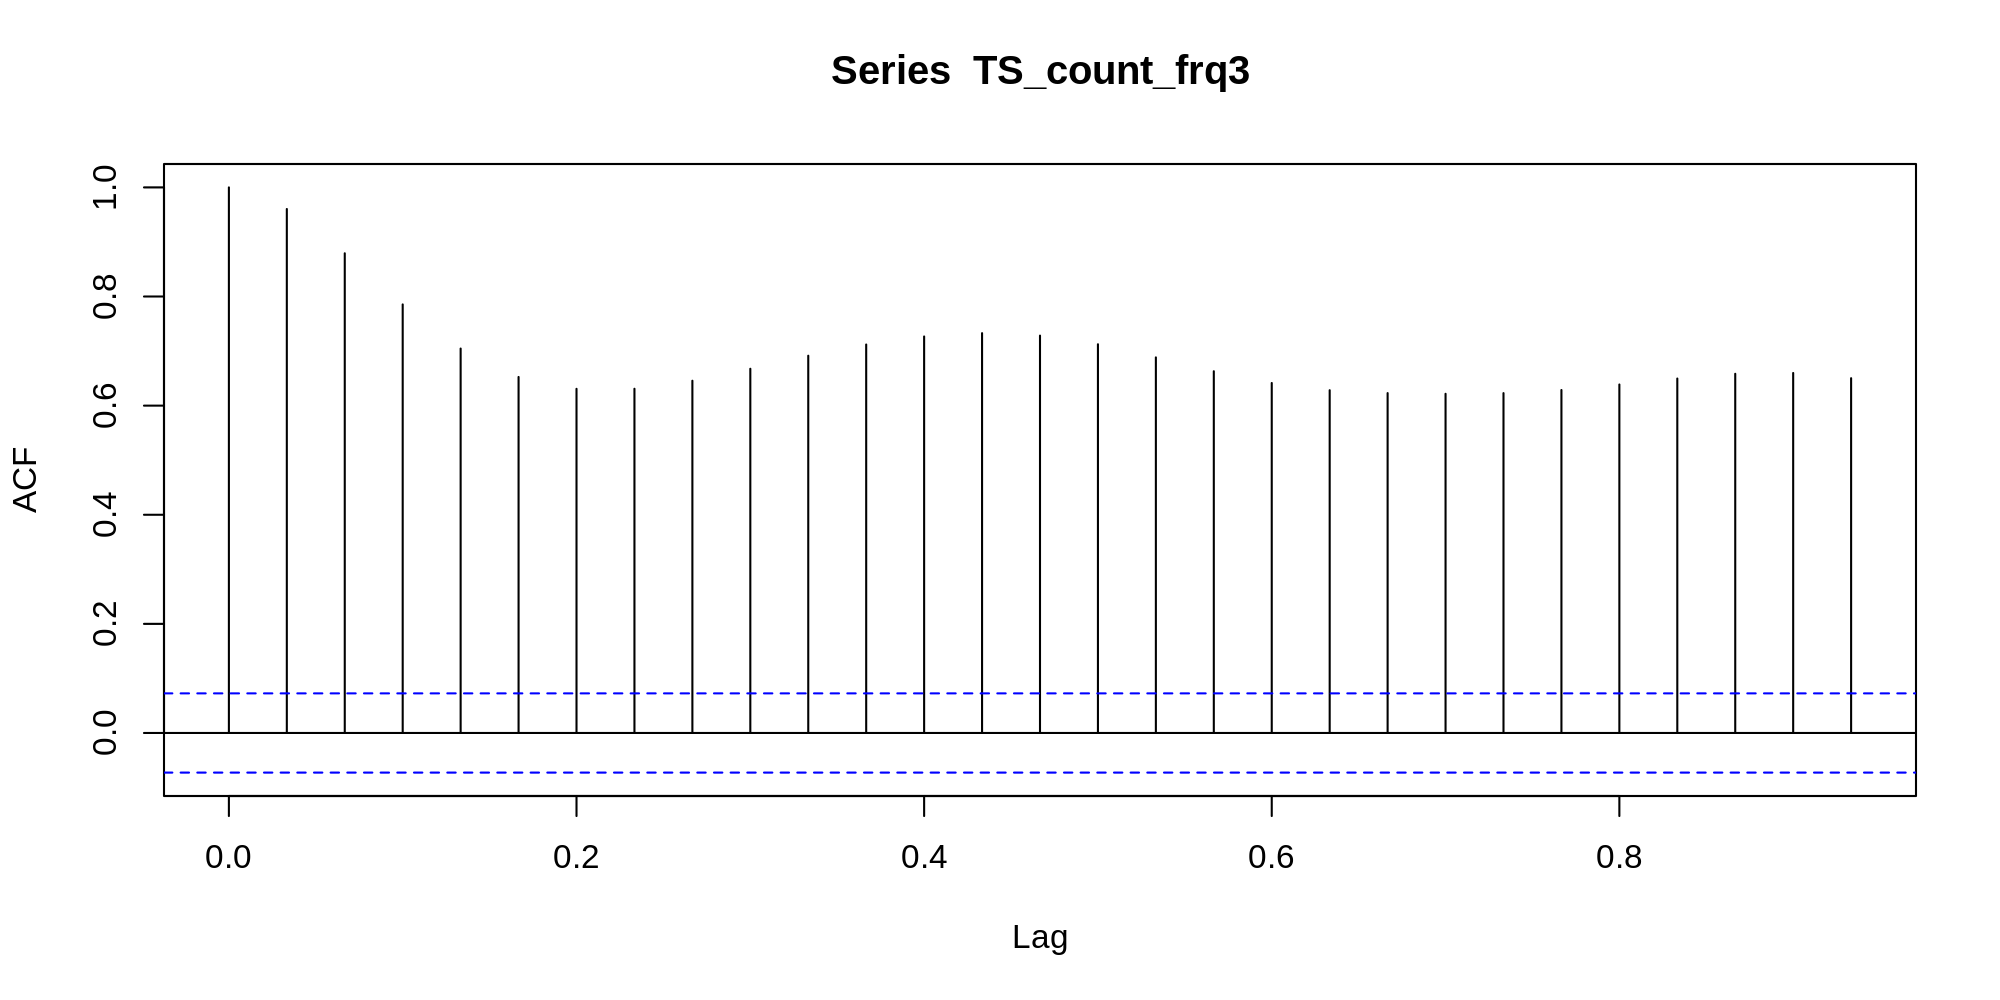

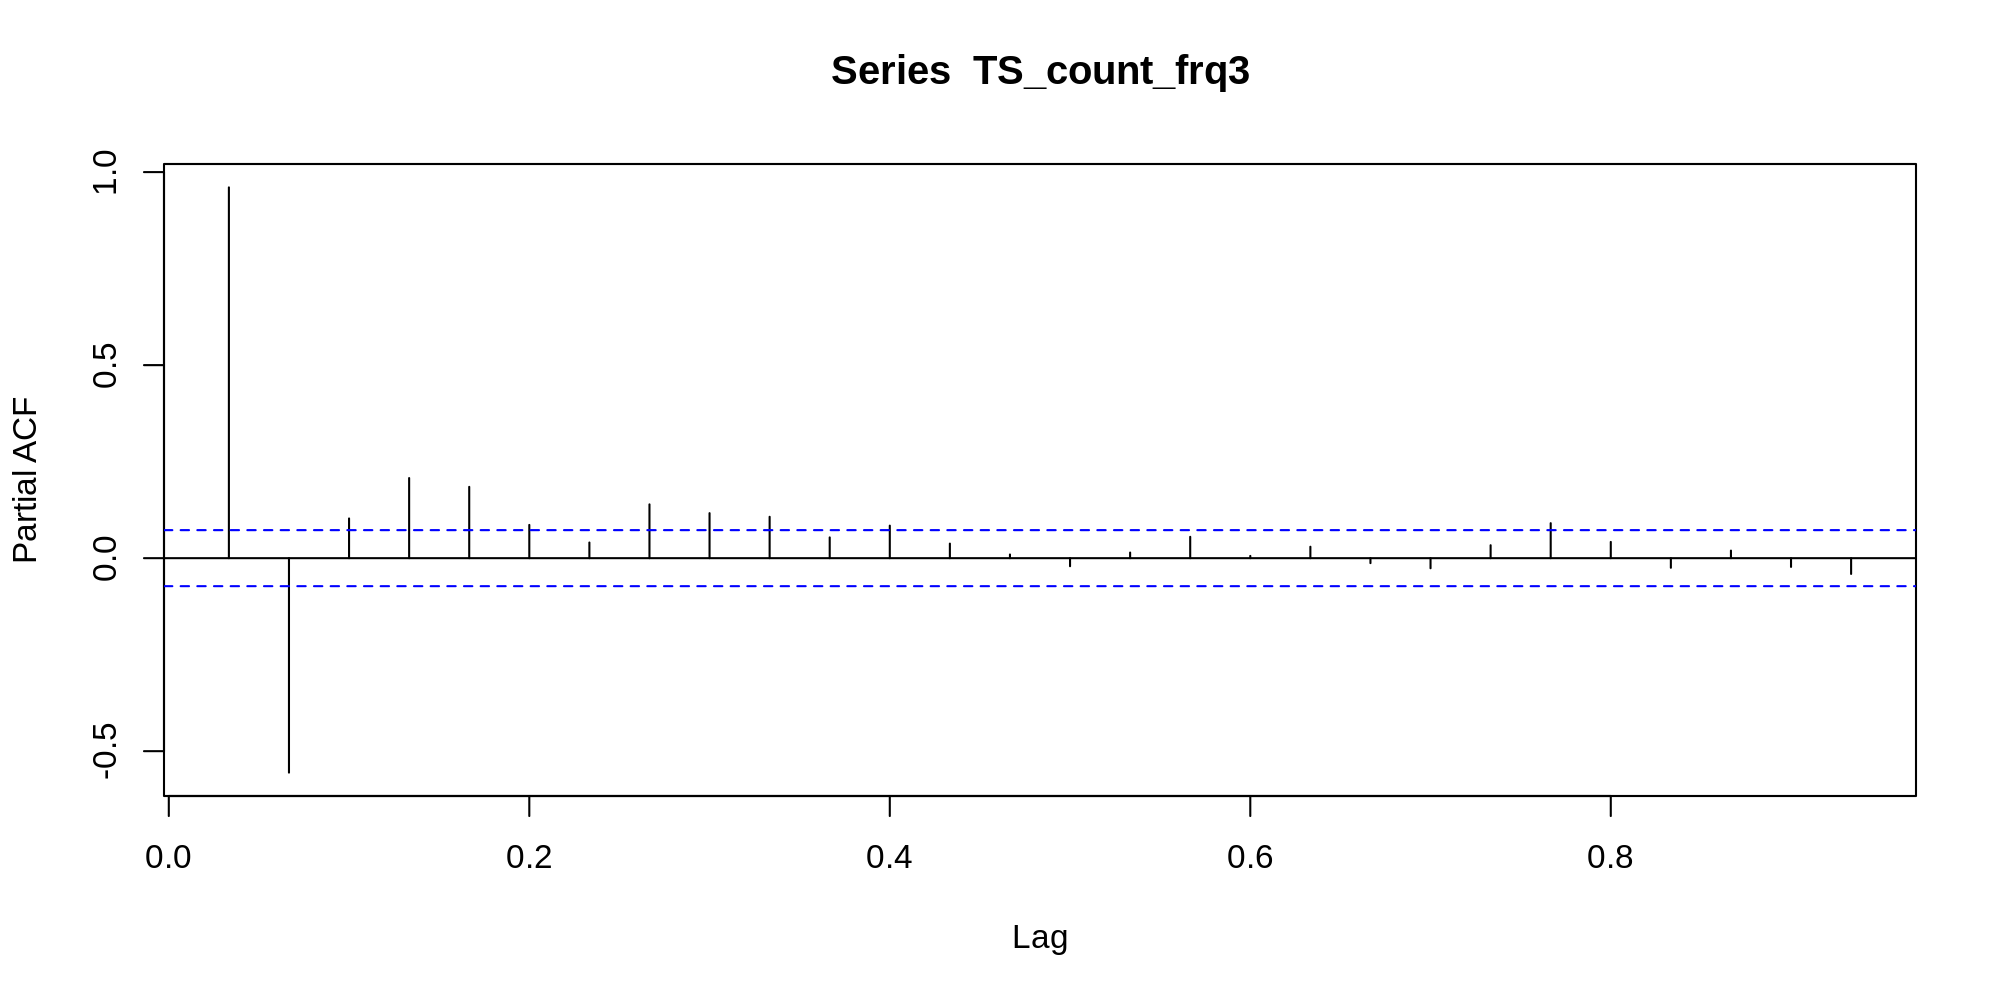

In [ ]:
#chacking autocorrelation
acf(TS_count_frq3) 
#checking for partial auto correlation 
pacf(TS_count_frq3) 



- we can clearly see that both acf and pacf tail off in other words a geometric decay which clearly states that we cannot use the AR or MA models
- this can also be interpreted to say the series is not stationary 
- we further check using the Dicky fuller test 


In [ ]:
#the dickey-fuller test
adf.test(TS_count_frq3) 


	Augmented Dickey-Fuller Test

data:  TS_count_frq3
Dickey-Fuller = -2.1331, Lag order = 8, p-value = 0.522
alternative hypothesis: stationary


- Here in the results, we can see that the p-value for time series is greater than 0.05, and we can say we fail to reject the null hypothesis and the time series is non-stationary. 
###***conclusion:***
since the date is not stationary we are not able to use AR or MA or ARMA , however we can use ARIMA but only after staionarizing our time series using diff</br> from the acf and pacf and dicky fuller test we can say ARIMA(3,0,8)

#***4-Forcasting with ARIMA model:***

###***Removing seasonal componant:***

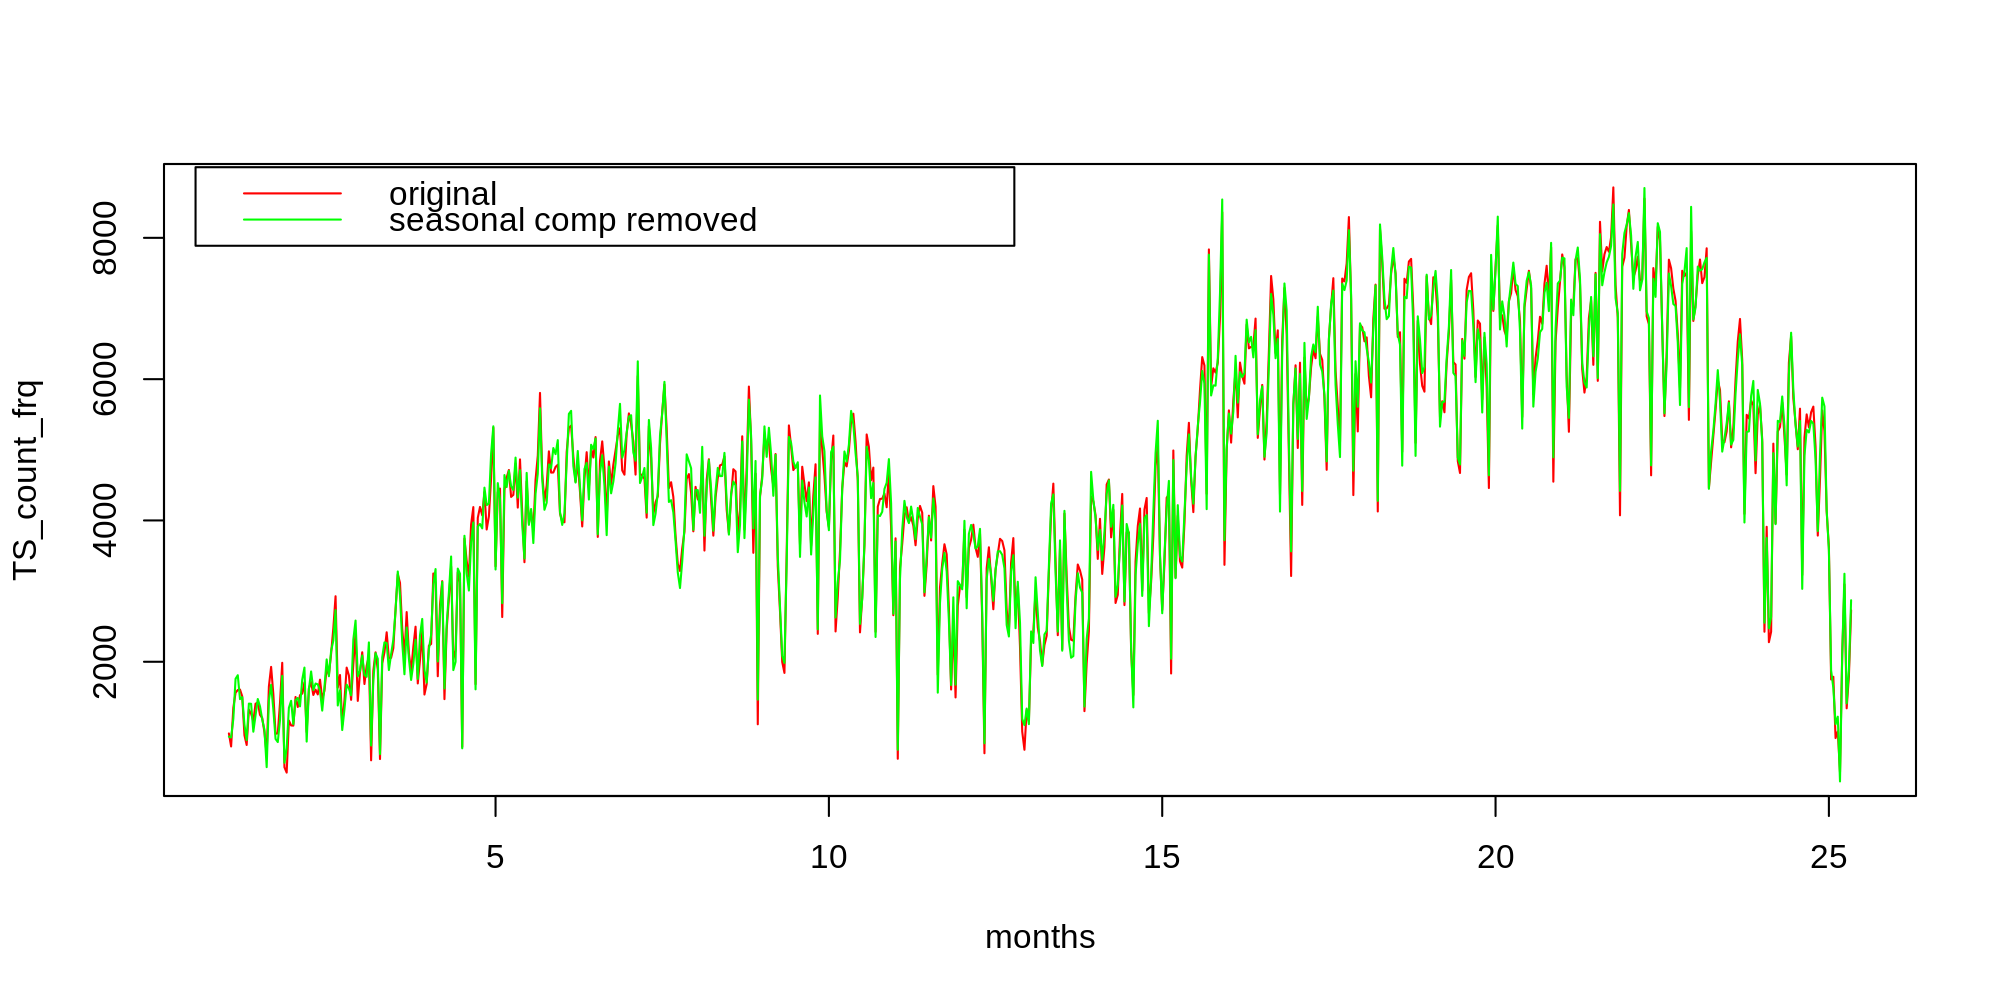

In [ ]:
TS_count_desnl=TS_count_frq - decompose(TS_count_frq)$seasonal 
plot(TS_count_frq, col = "red", xlab="months")
legend(0.5,9000, legend=c("original", "seasonal comp removed"), col=c("red", "green"),lty=1)
lines(TS_count_desnl, col = 'green')

###***Fitting an ARIMA model on deseasonal data:***

In [ ]:
#first we check it the deseasonal data is stationary
adf.test(TS_count_desnl)


	Augmented Dickey-Fuller Test

data:  TS_count_desnl
Dickey-Fuller = -1.2425, Lag order = 9, p-value = 0.899
alternative hypothesis: stationary


since the p value is greater then 0.05 the data is not stationary

In [ ]:
#stationarizing the time series 
#we use the differencing method
TS_count_desnl_st <- diff(TS_count_desnl,differences = 1) 

#checking the new time series
adf.test(TS_count_desnl_st)

Warning message in adf.test(TS_count_desnl_st):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  TS_count_desnl_st
Dickey-Fuller = -13.594, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


we started by removing the seasonal componenent and Now we have stationarized our time series (p value is less than 0.05) </br>


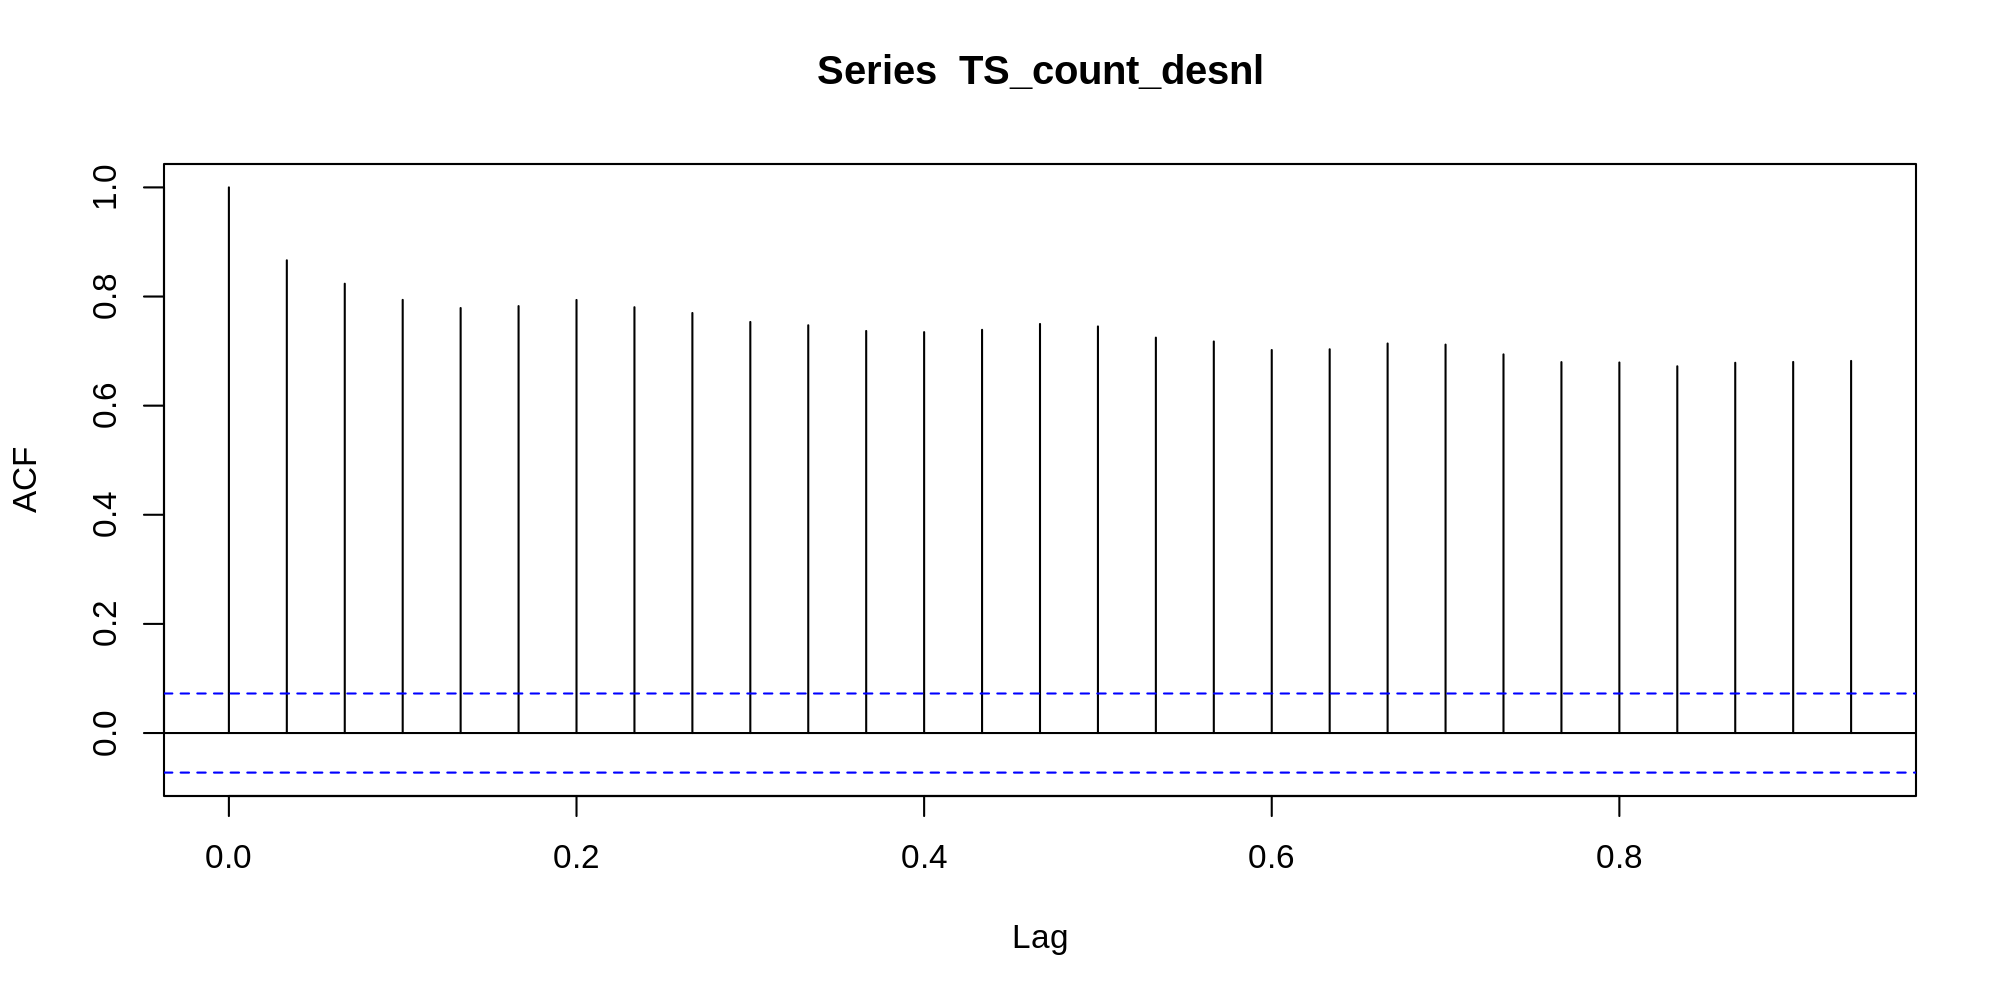

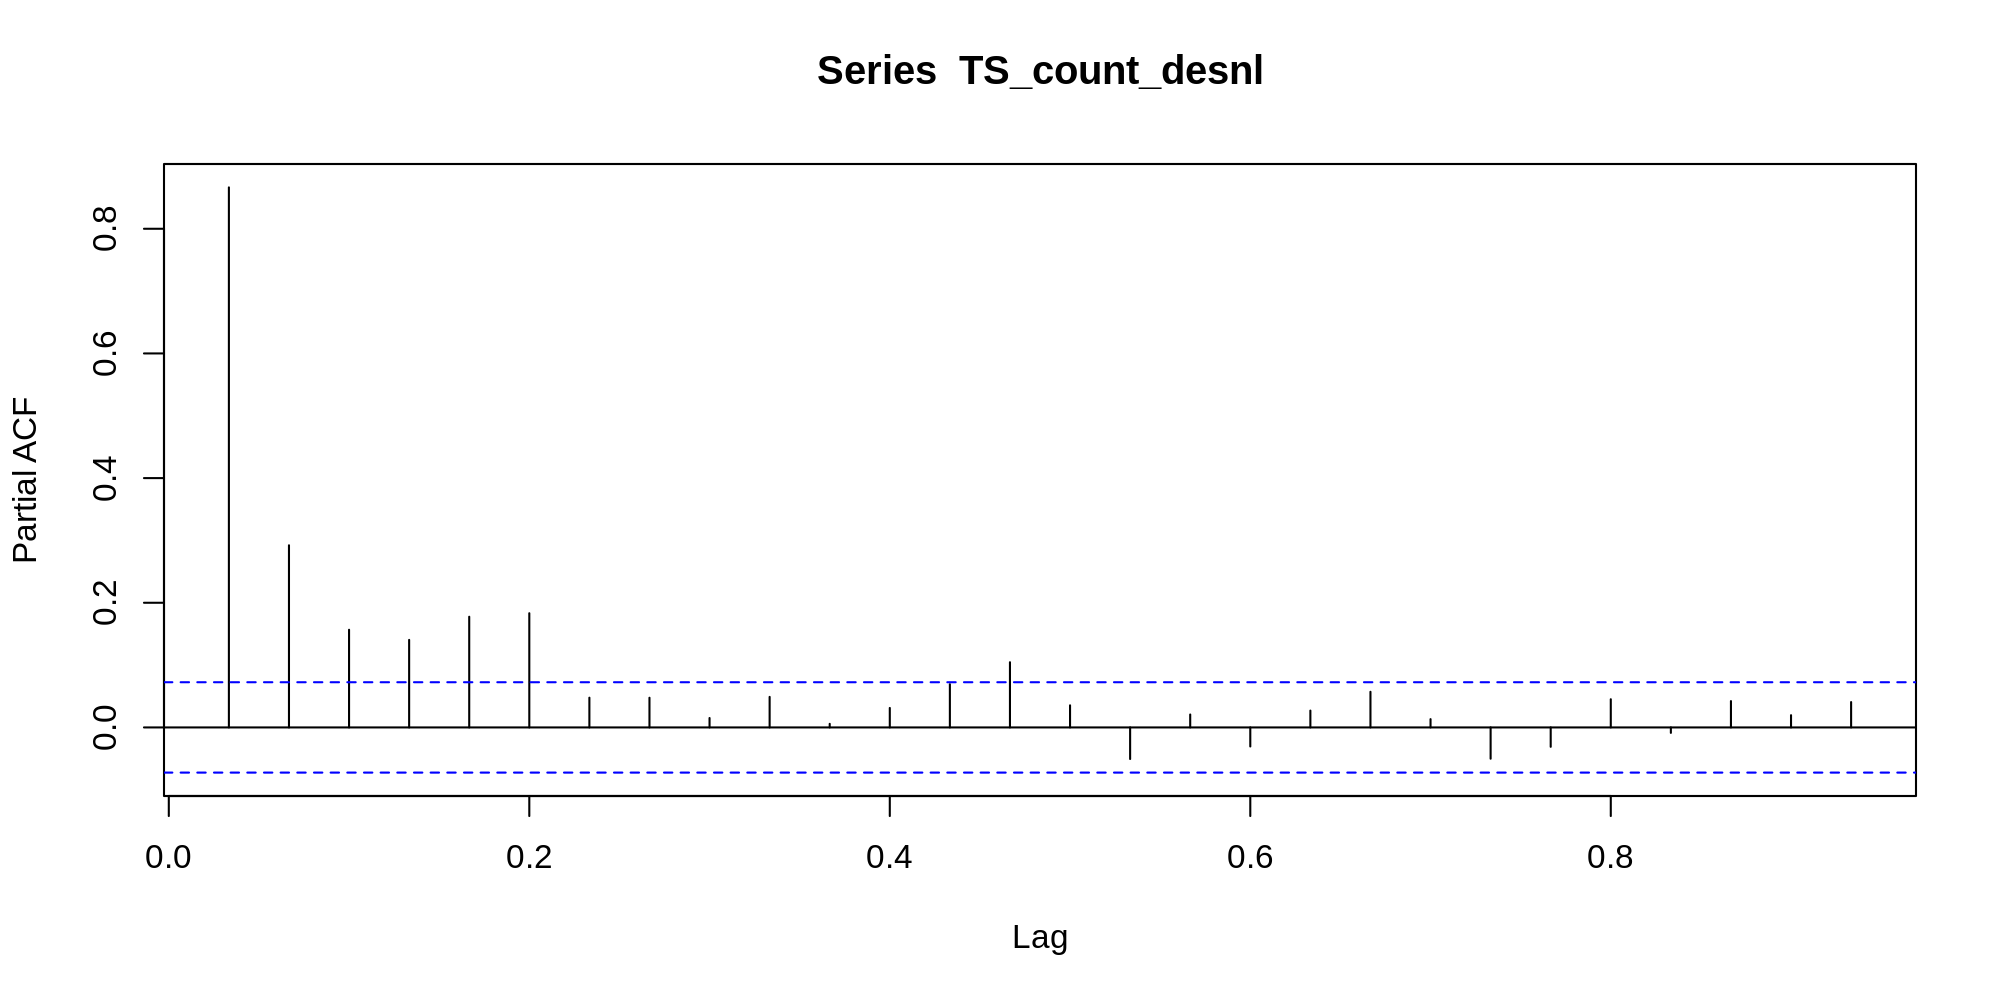

In [ ]:
#looking for p d q param for the model 
acf(TS_count_desnl)
pacf(TS_count_desnl)

###***looking for the params of ARIMA model p d p :***
- we used a differennig of first order to make our data stationary hence d=0
- from dicky fuller test lag order=8 then q=8
- From PACF, it’s clearly that within 6 lags the AR is significant. which means, we can use p = 6 
-  we build our ARIMA model ARIMA(6,0,8)

In [ ]:
TS_count_dsnl_arima <- arima(TS_count_desnl_st, order = c(6,0,8)) ########
TS_count_dsnl_arima

Warning message in arima(TS_count_desnl_st, order = c(6, 0, 8)):
“possible convergence problem: optim gave code = 1”



Call:
arima(x = TS_count_desnl_st, order = c(6, 0, 8))

Coefficients:
          ar1     ar2      ar3      ar4      ar5      ar6      ma1      ma2
      -0.1945  0.0957  -1.0569  -0.4056  -0.0361  -0.5747  -0.3762  -0.3398
s.e.   0.1559  0.1911   0.1866   0.1792   0.1411   0.2276   0.1631   0.1983
         ma3      ma4      ma5     ma6      ma7      ma8  intercept
      1.0100  -0.2648  -0.3234  0.5417  -0.4762  -0.1335     1.8952
s.e.  0.1591   0.2818   0.1263  0.2261   0.1233   0.0617     6.1737

sigma^2 estimated as 677193:  log likelihood = -5938.36,  aic = 11908.72

###***Fitting with auto arima:***


In [ ]:
TS_count_desnl_autoarima <- auto.arima(TS_count_desnl, seasonal = FALSE)
TS_count_desnl_autoarima

Series: TS_count_desnl 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.3037  -0.8659
s.e.  0.0446   0.0222

sigma^2 = 712654:  log likelihood = -5954.27
AIC=11914.55   AICc=11914.58   BIC=11928.33

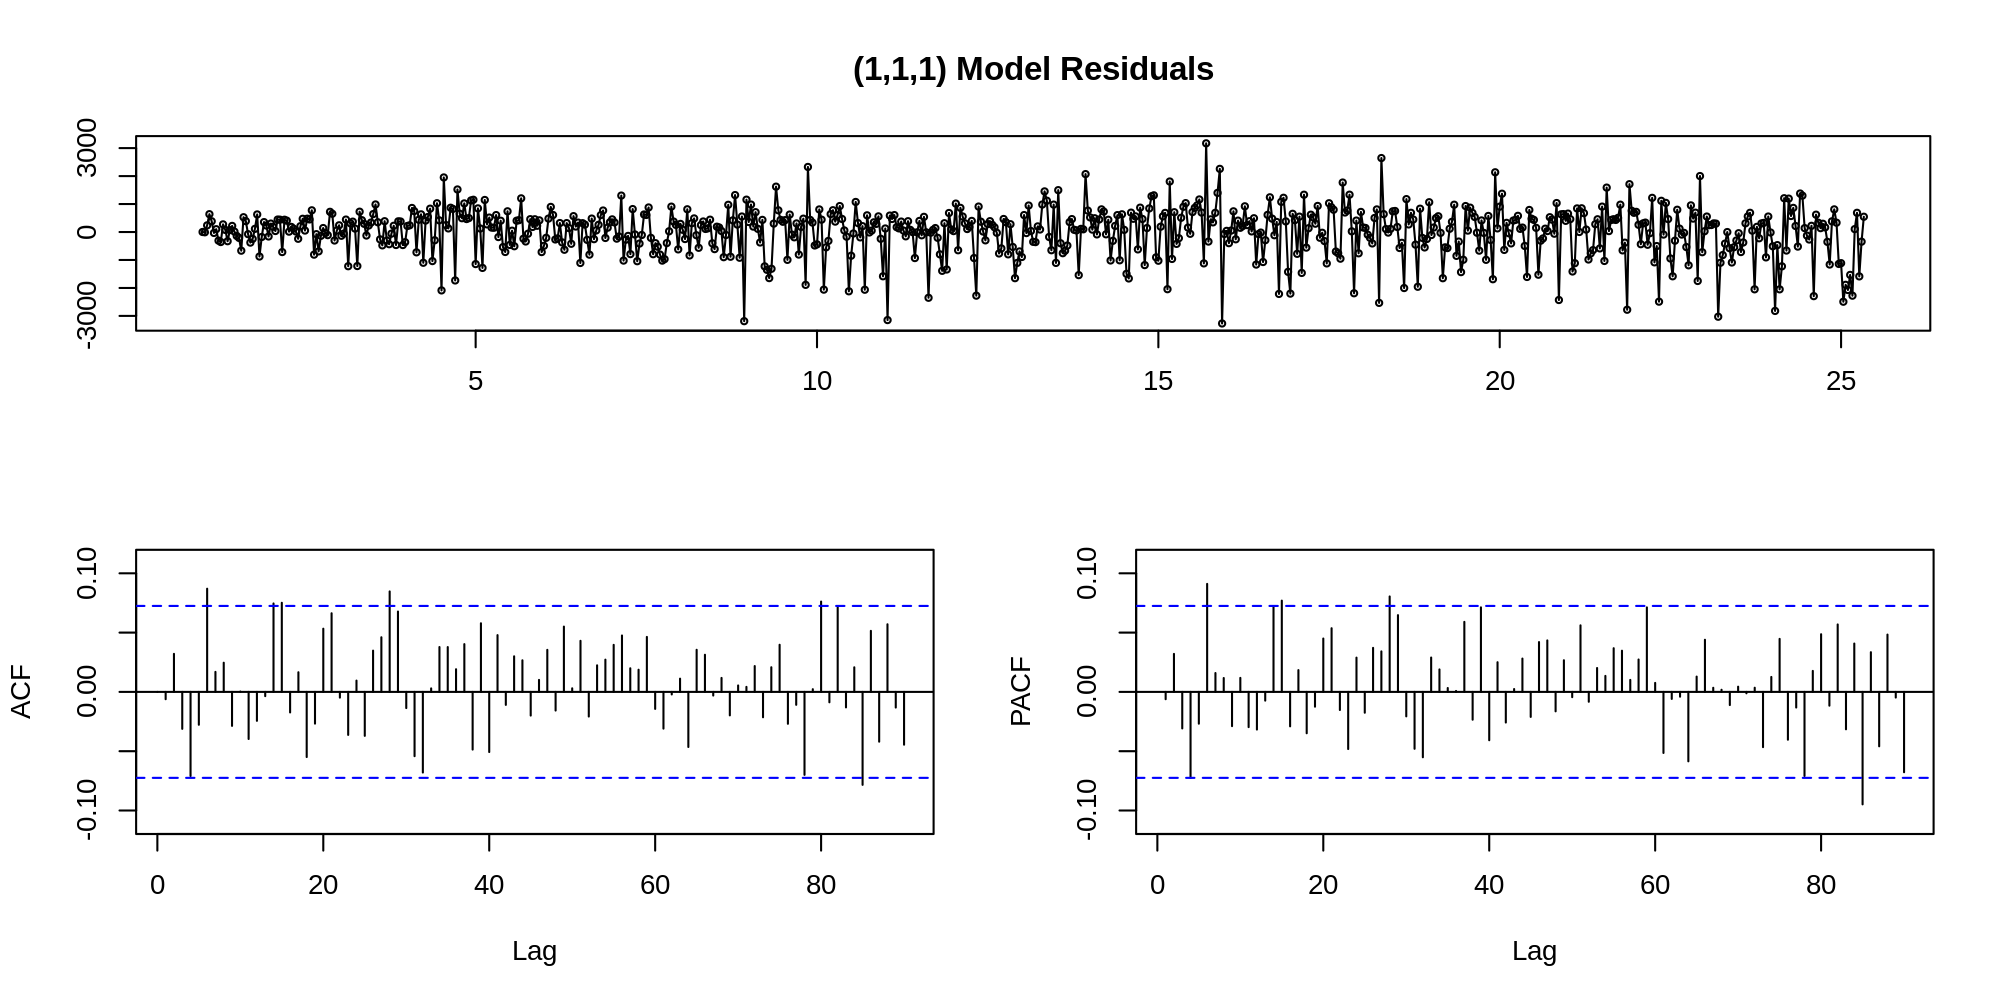

In [ ]:
#checking residual
TS_count_desnl_autoarima_res <- TS_count_desnl_autoarima$residuals
tsdisplay(TS_count_desnl_autoarima_res, main='(1,1,1) Model Residuals') 

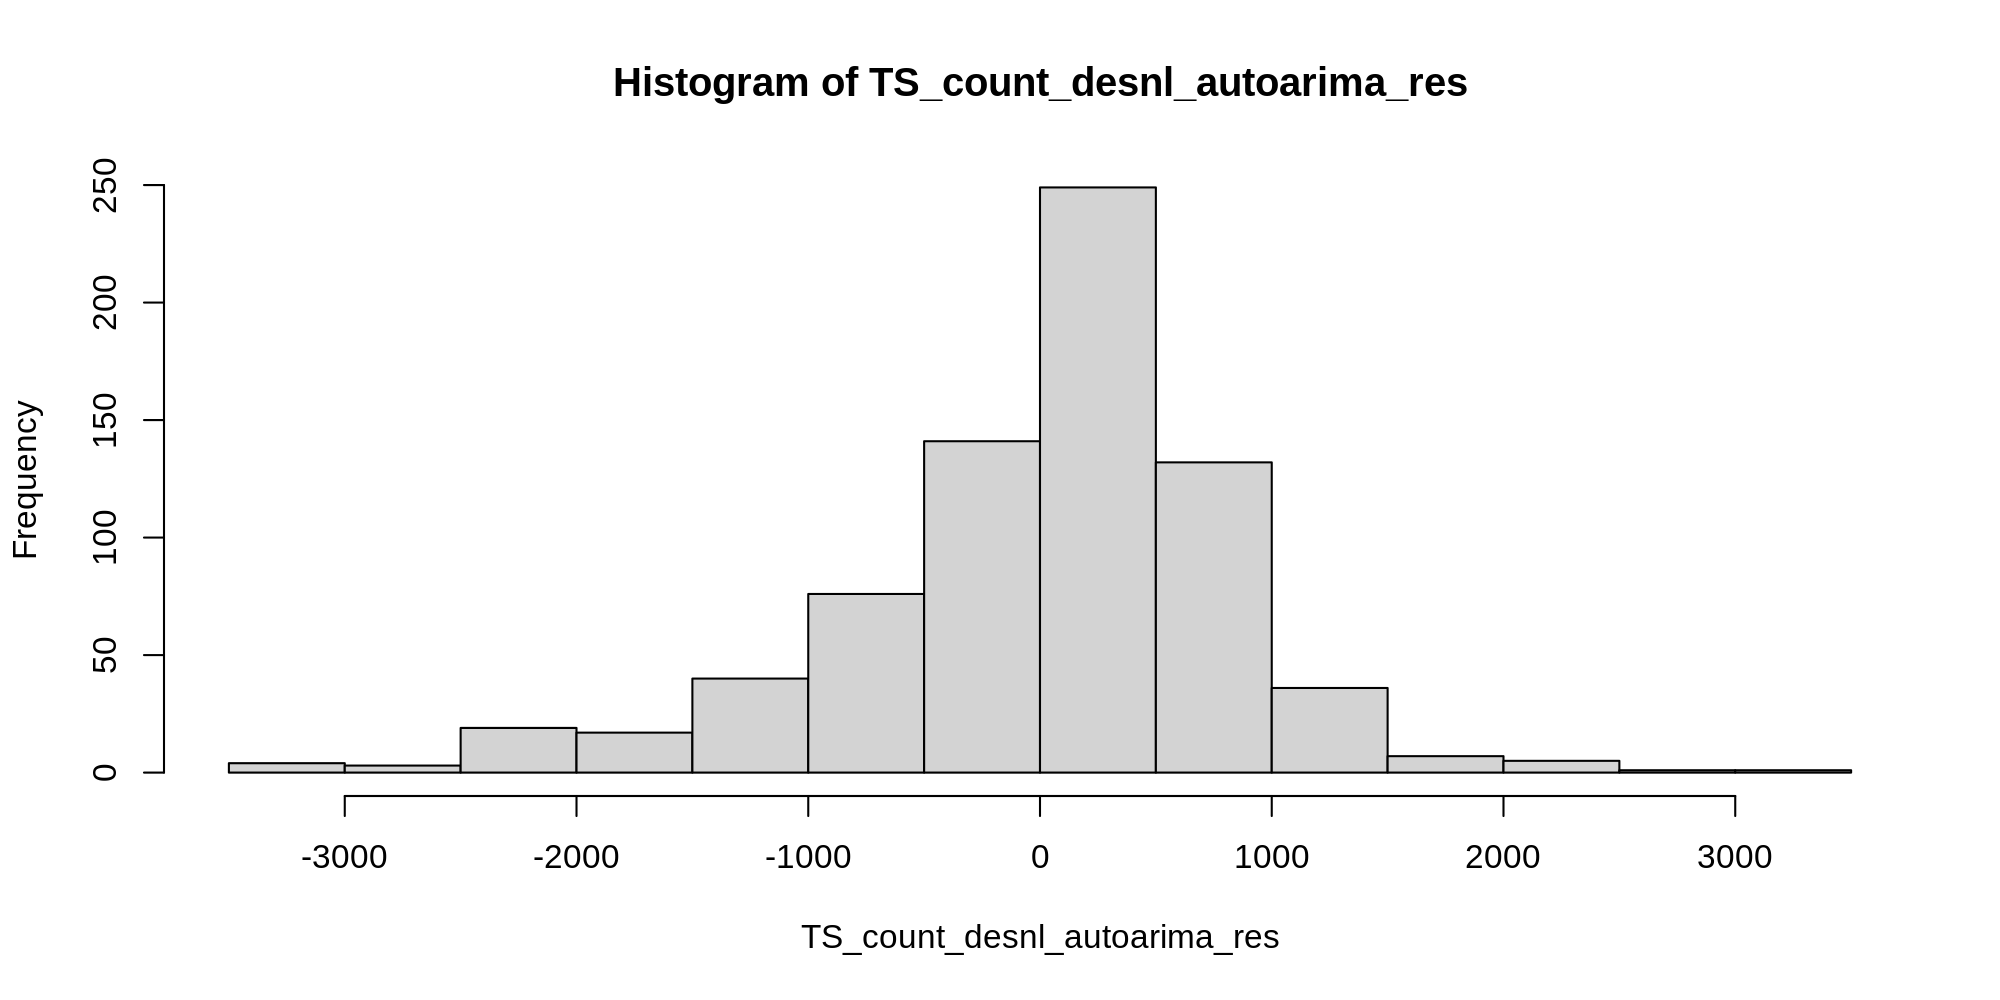

In [ ]:
hist(TS_count_desnl_autoarima_res)

The residuals are not normally distributed. The auto.arima() function didn’t give us a good model.

###***Evaluate and iterate:***


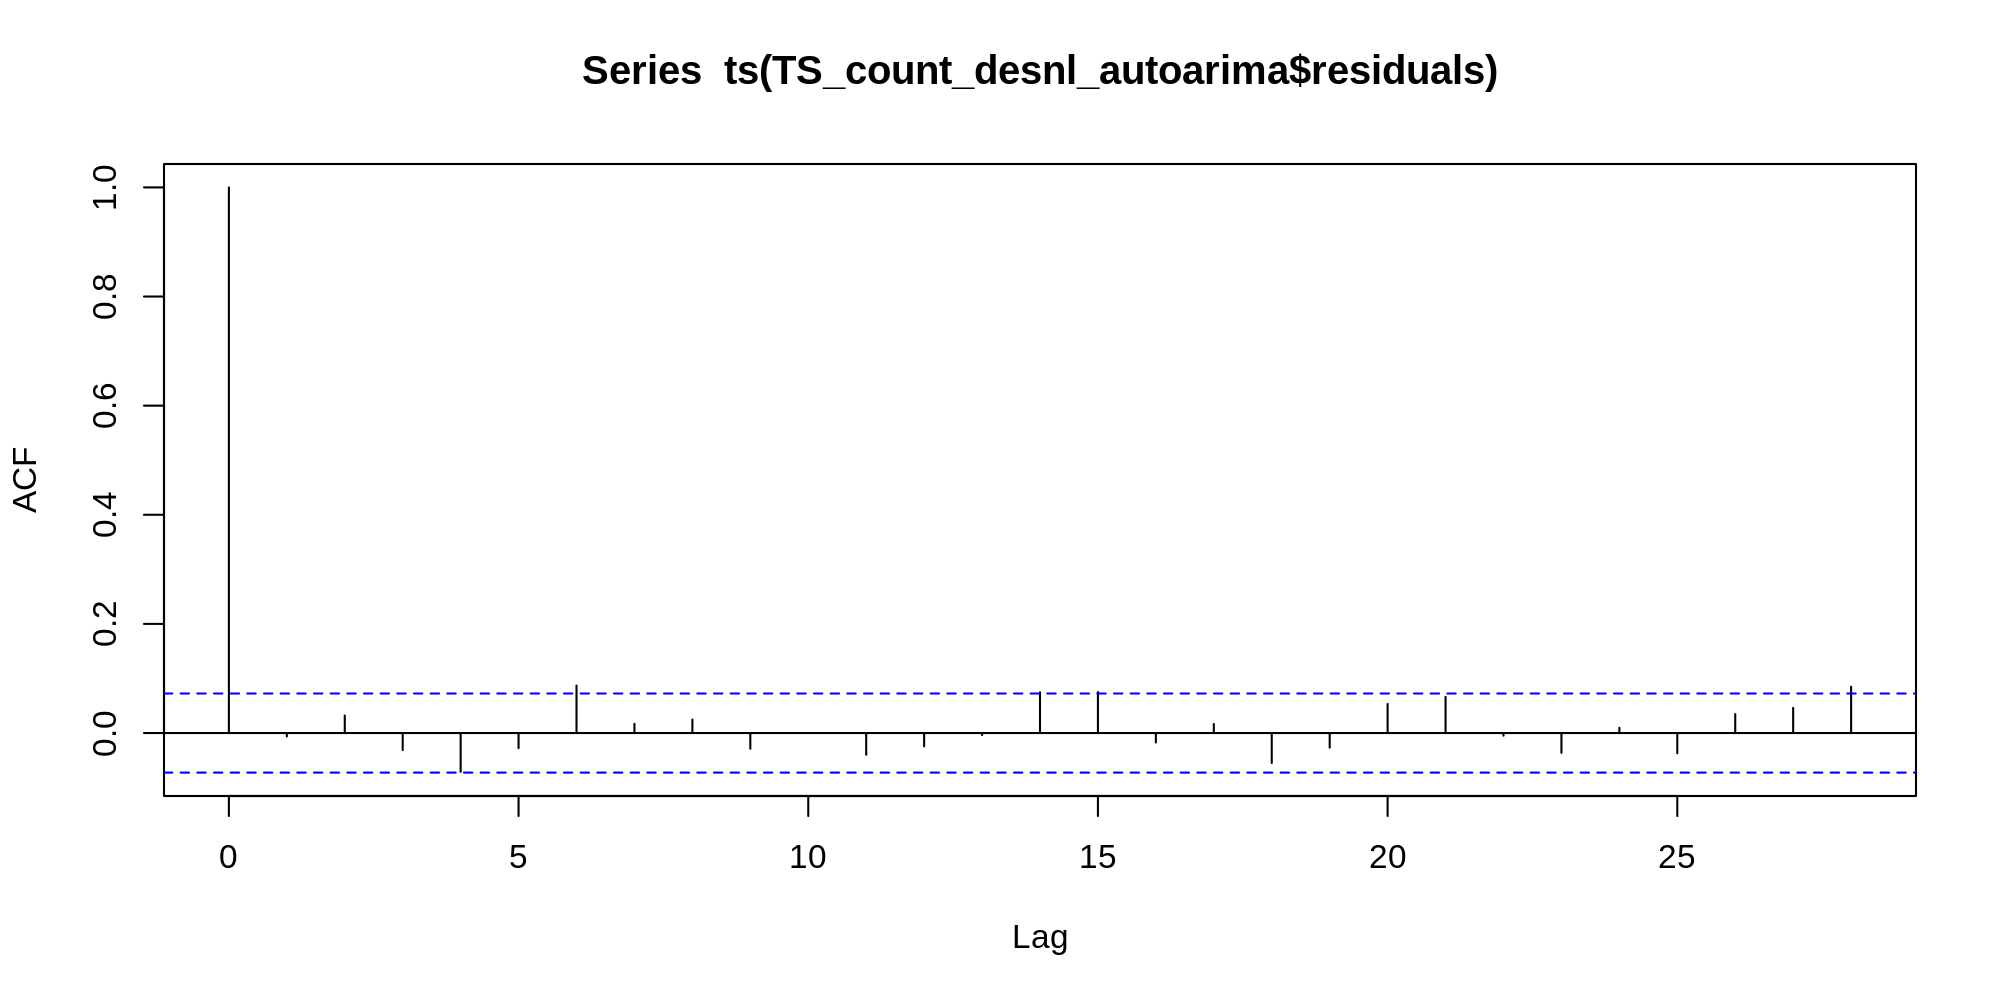

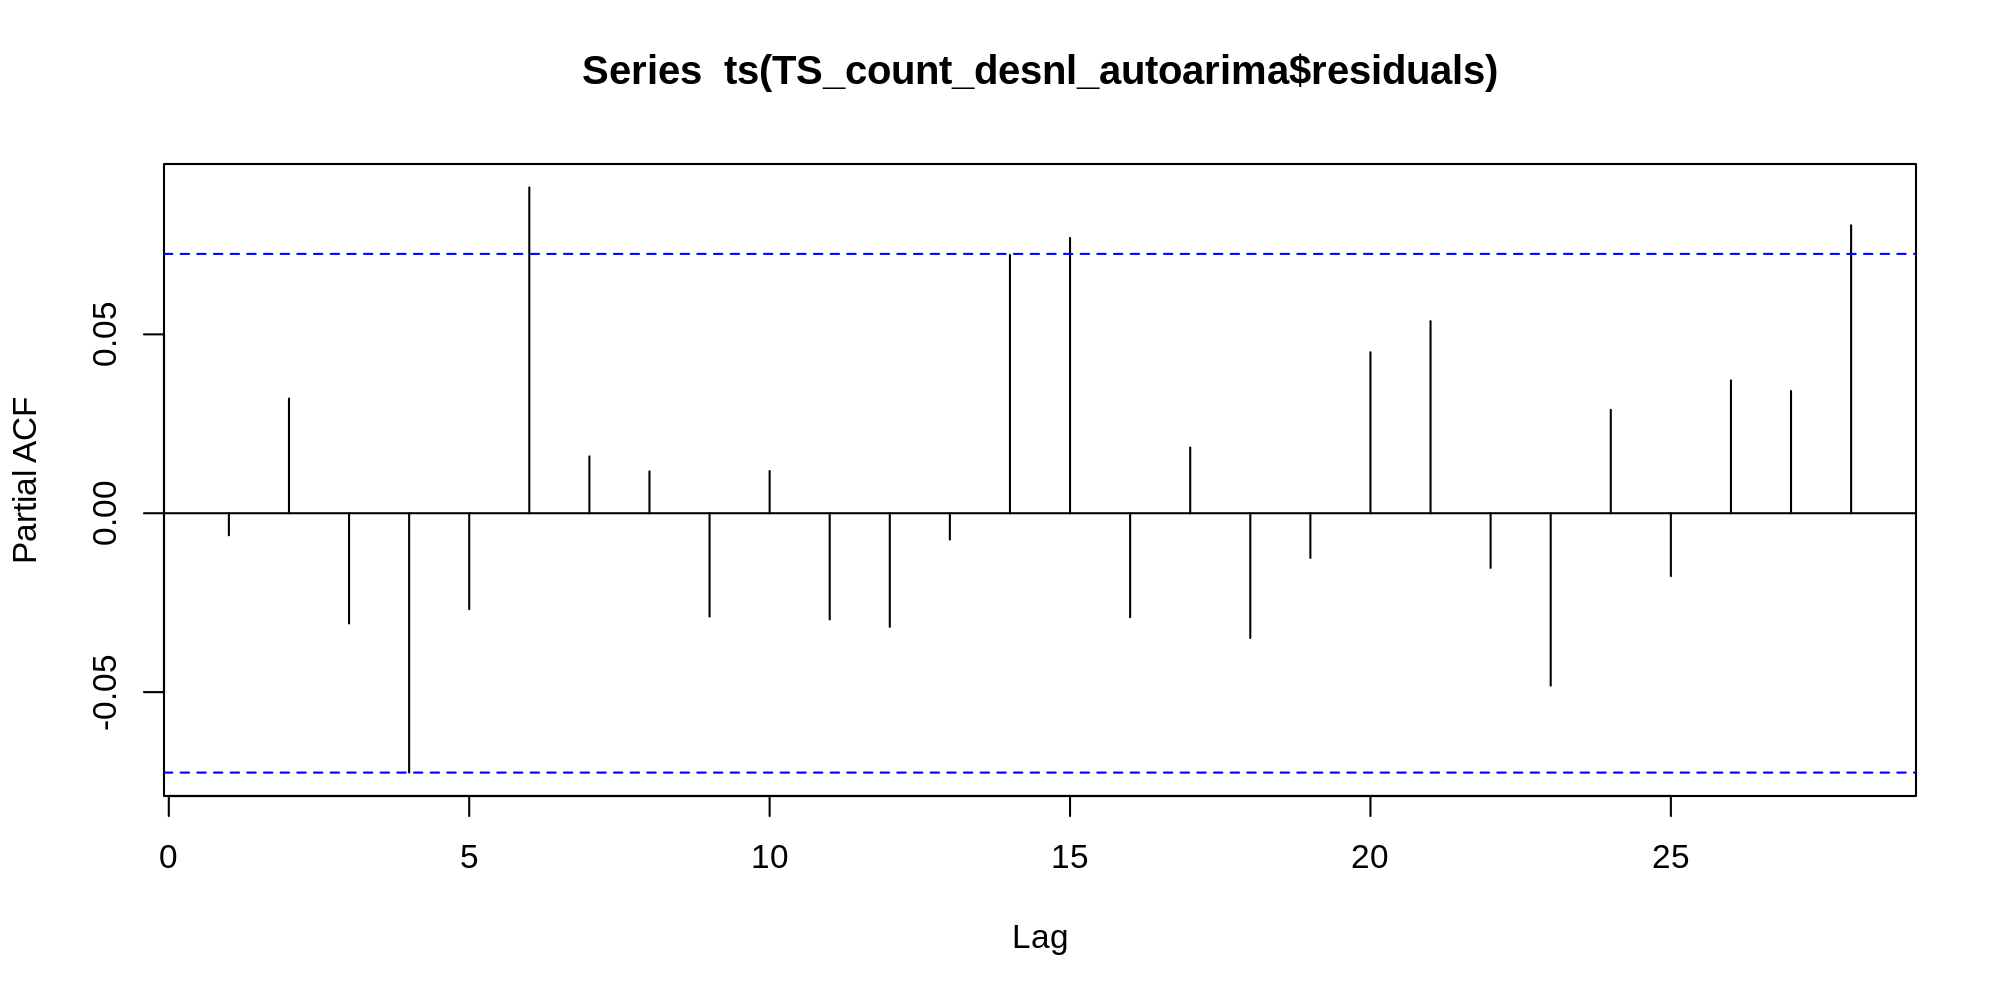

In [ ]:
#plotting
acf(ts(TS_count_desnl_autoarima$residuals))
pacf(ts(TS_count_desnl_autoarima$residuals))

In [ ]:
#training the model we previously had with 10 diffrent p values
aic.values <- c()
for (p in (0:9)){ #######
  TS_count_dsnl_arima <- arima(TS_count_desnl, order = c(p,0,8)) ########
  aic.values <- c(aic.values, TS_count_dsnl_arima$aic)
}

Warning message in arima(TS_count_desnl, order = c(p, 0, 8)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(TS_count_desnl, order = c(p, 0, 8)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(TS_count_desnl, order = c(p, 0, 8)):
“possible convergence problem: optim gave code = 1”


In [ ]:
which.min(aic.values)

[1] 8

the min aic model was 7 so the best model is ARIMA(8,0,8)


In [ ]:
TS_count_dsnl_arima <- arima(TS_count_desnl, order = c(8,0,8)) #####
TS_count_dsnl_arima


Call:
arima(x = TS_count_desnl, order = c(8, 0, 8))

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ar6     ar7      ar8
      0.2756  0.1003  -0.5355  0.4938  -0.0124  -0.0407  0.8531  -0.1536
s.e.  0.2023  0.1251   0.0597  0.1823   0.1652   0.0648  0.1111   0.1709
         ma1     ma2     ma3      ma4     ma5     ma6      ma7      ma8
      0.1610  0.0772  0.6546  -0.1920  0.0366  0.2043  -0.7625  -0.0695
s.e.  0.2037  0.0879  0.0526   0.1848  0.1009  0.0599   0.0995   0.1428
      intercept
       4503.926
s.e.   1729.672

sigma^2 estimated as 671459:  log likelihood = -5945.3,  aic = 11926.59


	Box-Ljung test

data:  TS_count_desnl_forcast
X-squared = Inf, df = 20, p-value < 2.2e-16


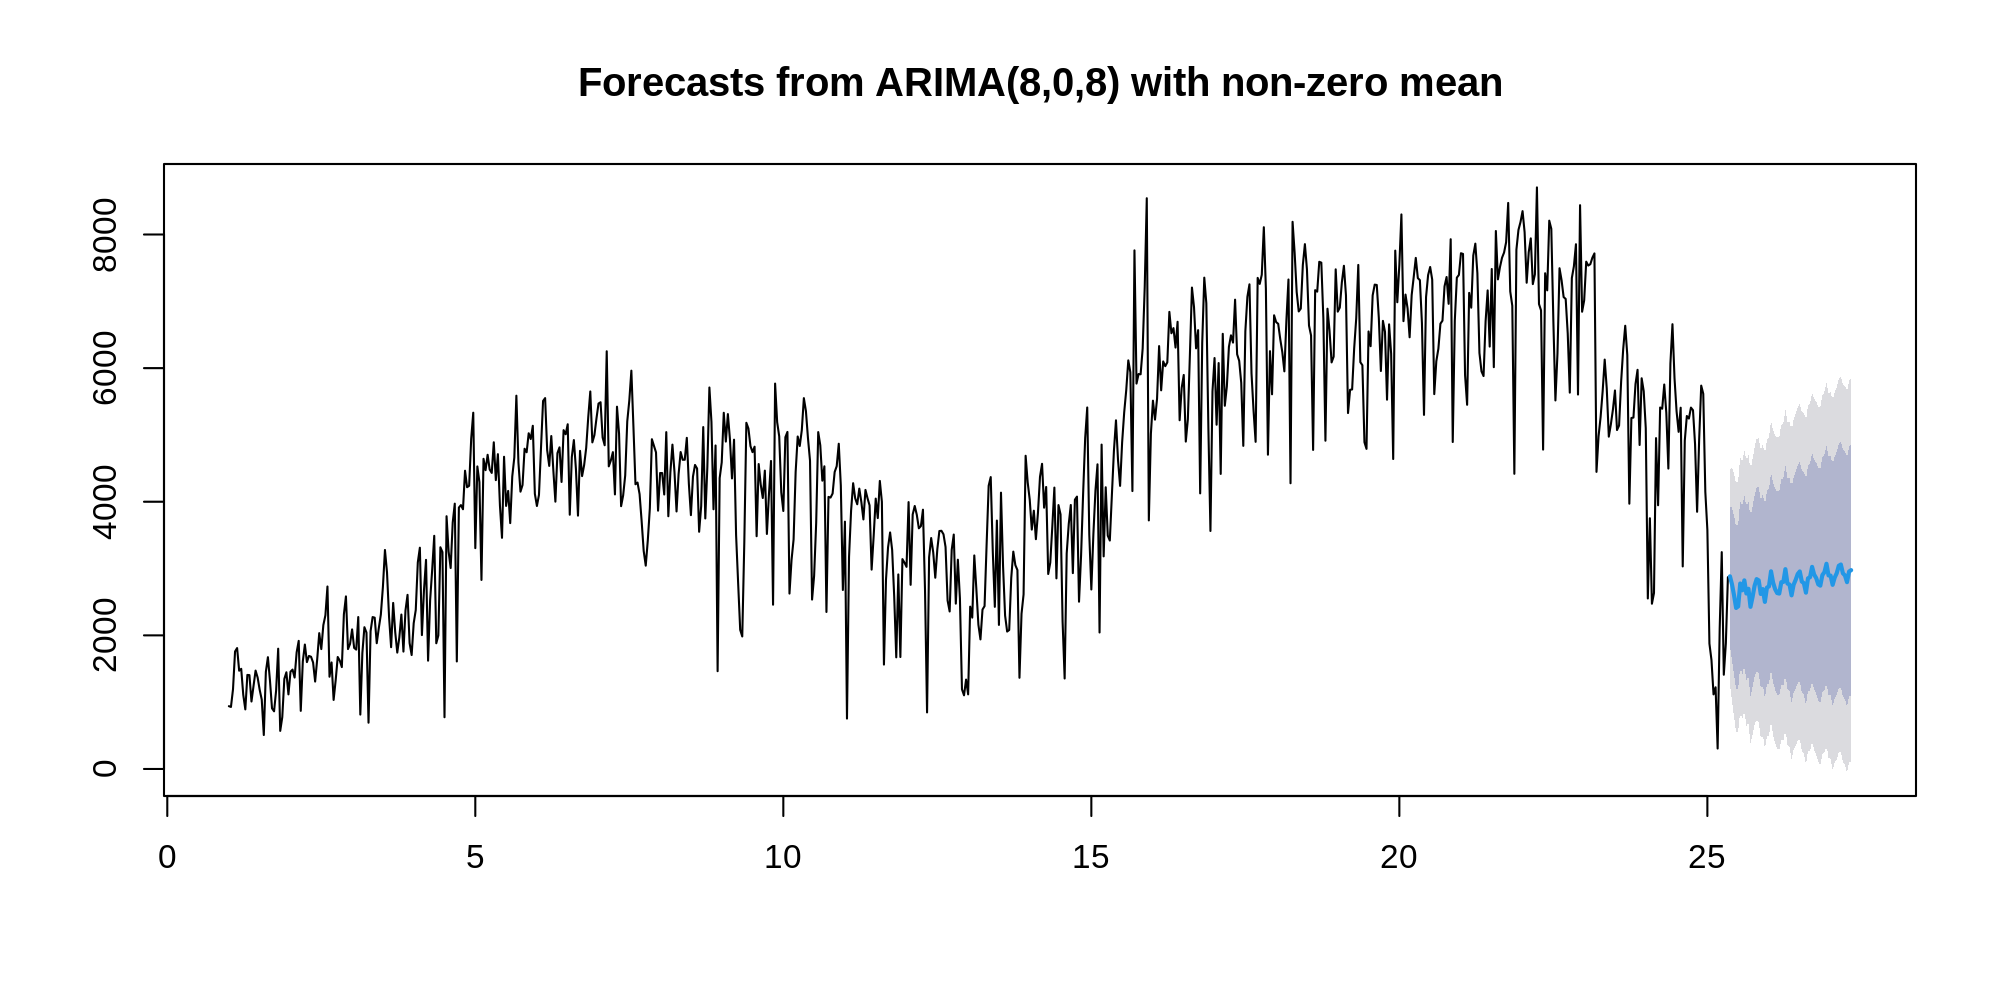

In [ ]:
TS_count_desnl_forcast <- forecast(TS_count_dsnl_arima)
plot(TS_count_desnl_forcast)
Box.test(TS_count_desnl_forcast, lag=20, type="Ljung-Box")

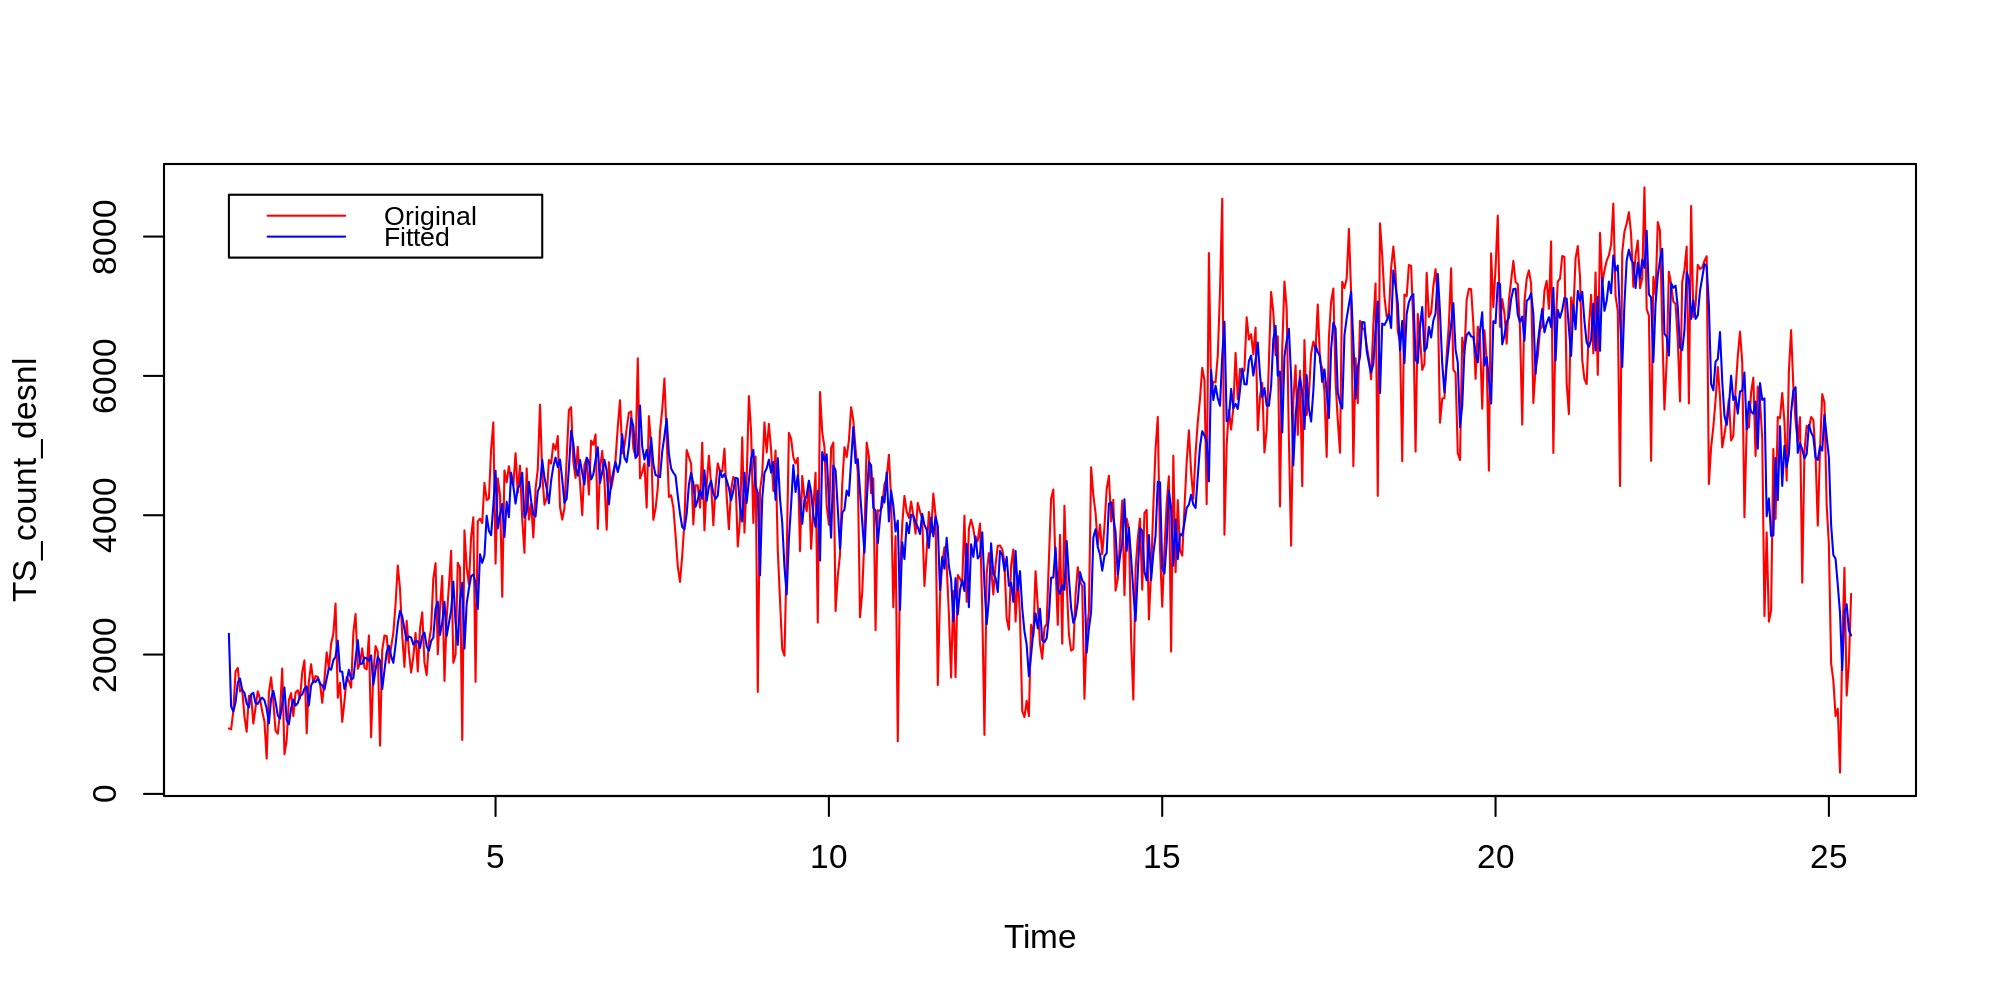

In [ ]:
#Plot both the original and the forecasted time series ##########
plot(TS_count_desnl, col="red") # original
legend(1, 8600, legend=c("Original", "Fitted"), col=c("red", "blue"), lty=1, cex=0.8)
lines(fitted(TS_count_dsnl_arima), col="blue") # fitted

###***Forcasting***

In [ ]:
#Split the data into training and test times series
end_time = time(TS_count_desnl)[700]
train_set <- window(TS_count_desnl, end=end_time)
test_set <- window(TS_count_desnl, start=end_time)

#fit an Arima model, manually
manual_fit <- Arima(train_set, order=c(8, 0, 8)) #######
manual_fc <- forecast(manual_fit, h=32)
print(paste("Accuracy of the manual Arima model : ", accuracy(manual_fc, test_set)[2,"RMSE"]))

#fit with auto arima
auto_fit <- auto.arima(train_set, seasonal = FALSE)
auto_fc <- forecast(auto_fit, h=32)
print(paste("Accuracy of the auto Arima model : ", accuracy(auto_fc, test_set)[2,"RMSE"]))

[1] "Accuracy of the manual Arima model :  1868.95426866462"
[1] "Accuracy of the auto Arima model :  1939.23863437764"


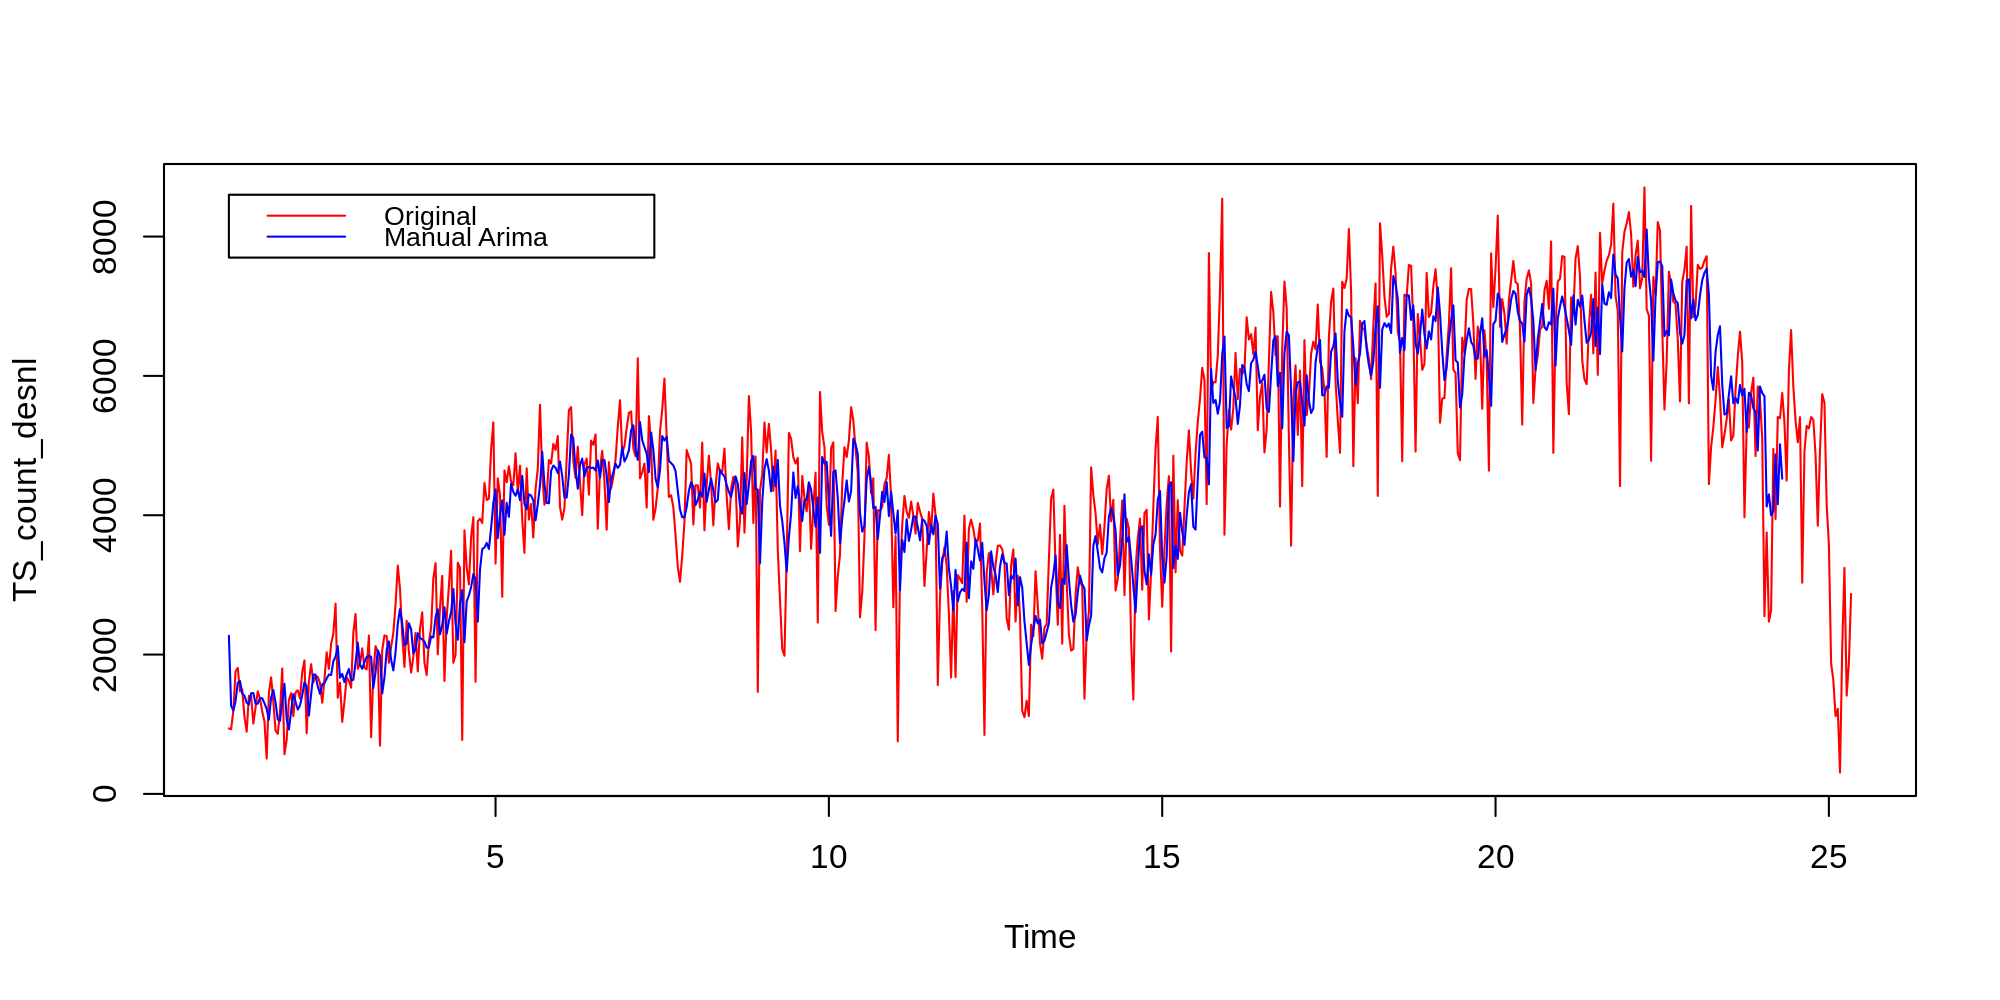

In [ ]:
plot(TS_count_desnl, col="red") # original
legend(1, 8600, legend=c("Original", "Manual Arima"), col=c("red", "blue"), lty=1, cex=0.8)
lines(fitted(manual_fc), col="blue") # manuall arima

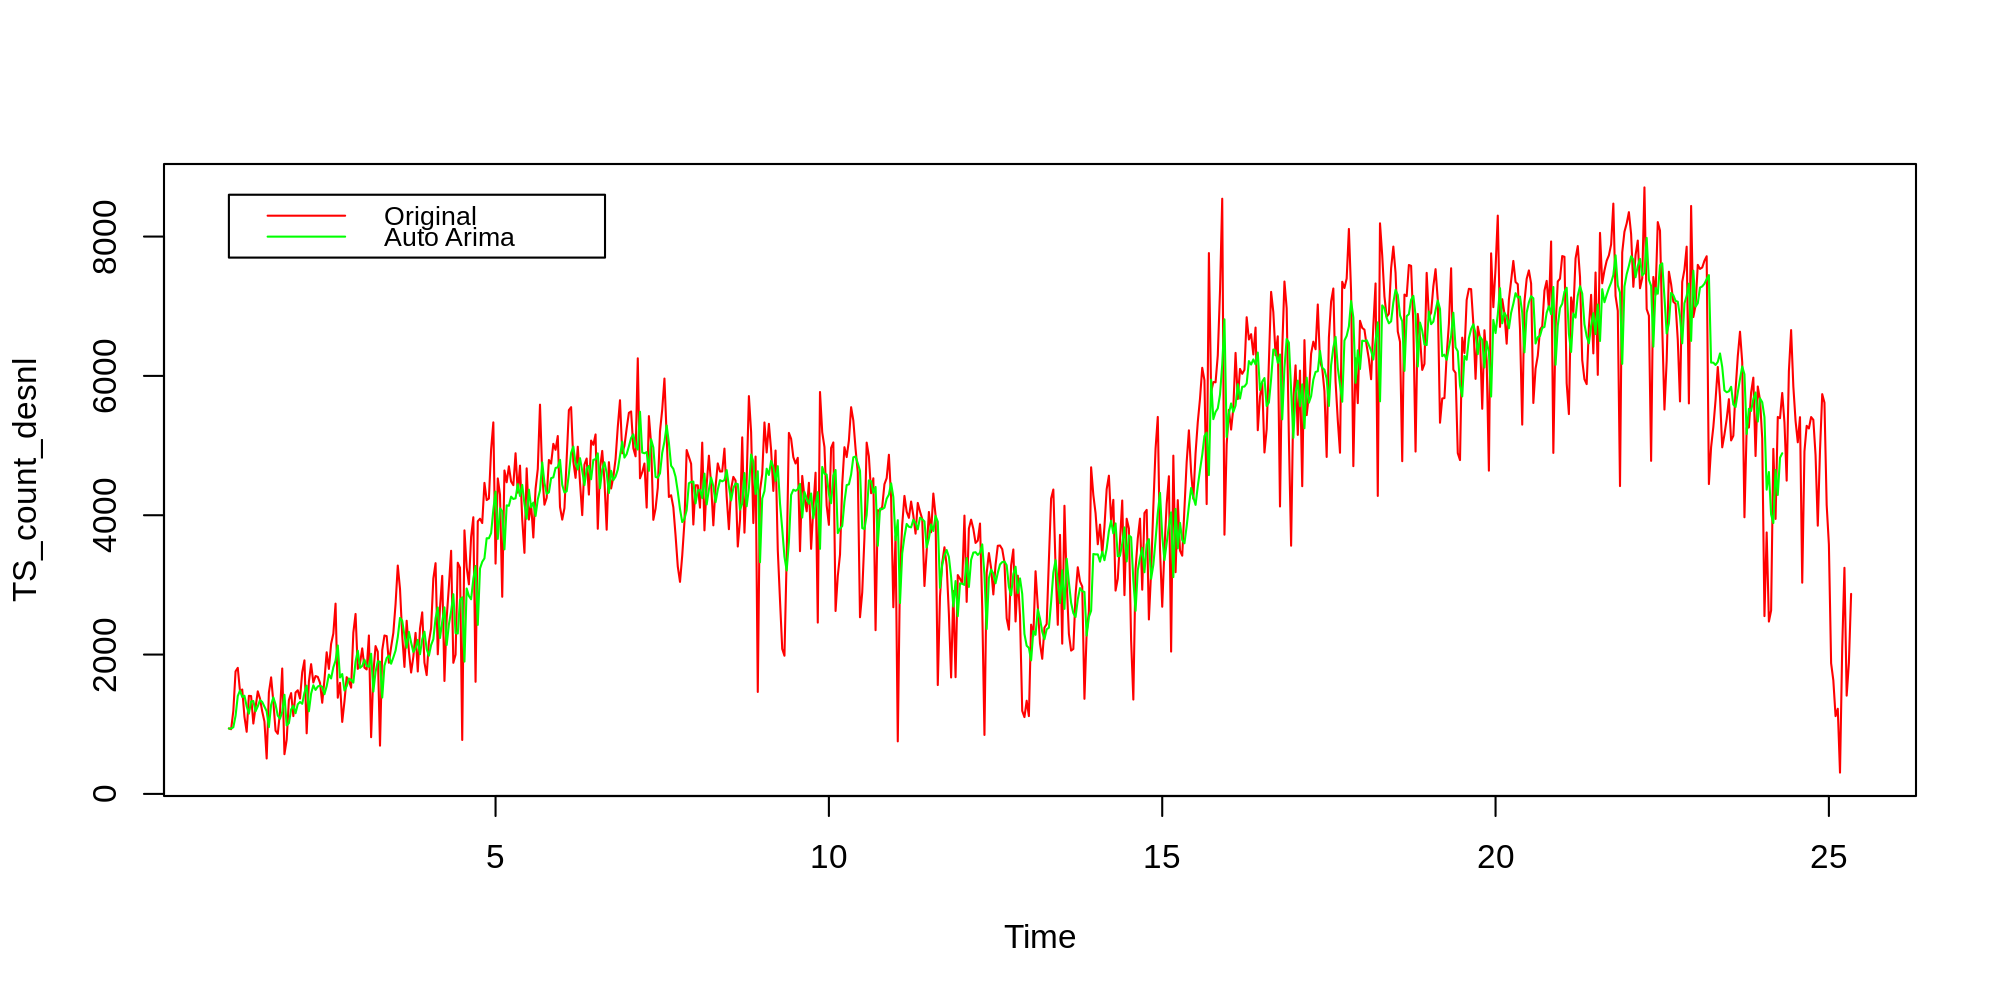

In [ ]:
plot(TS_count_desnl, col="red") # original
legend(1, 8600, legend=c("Original", "Auto Arima"), col=c("red", "green"), lty=1, cex=0.8)
lines(fitted(auto_fit), col="green") # auto arima


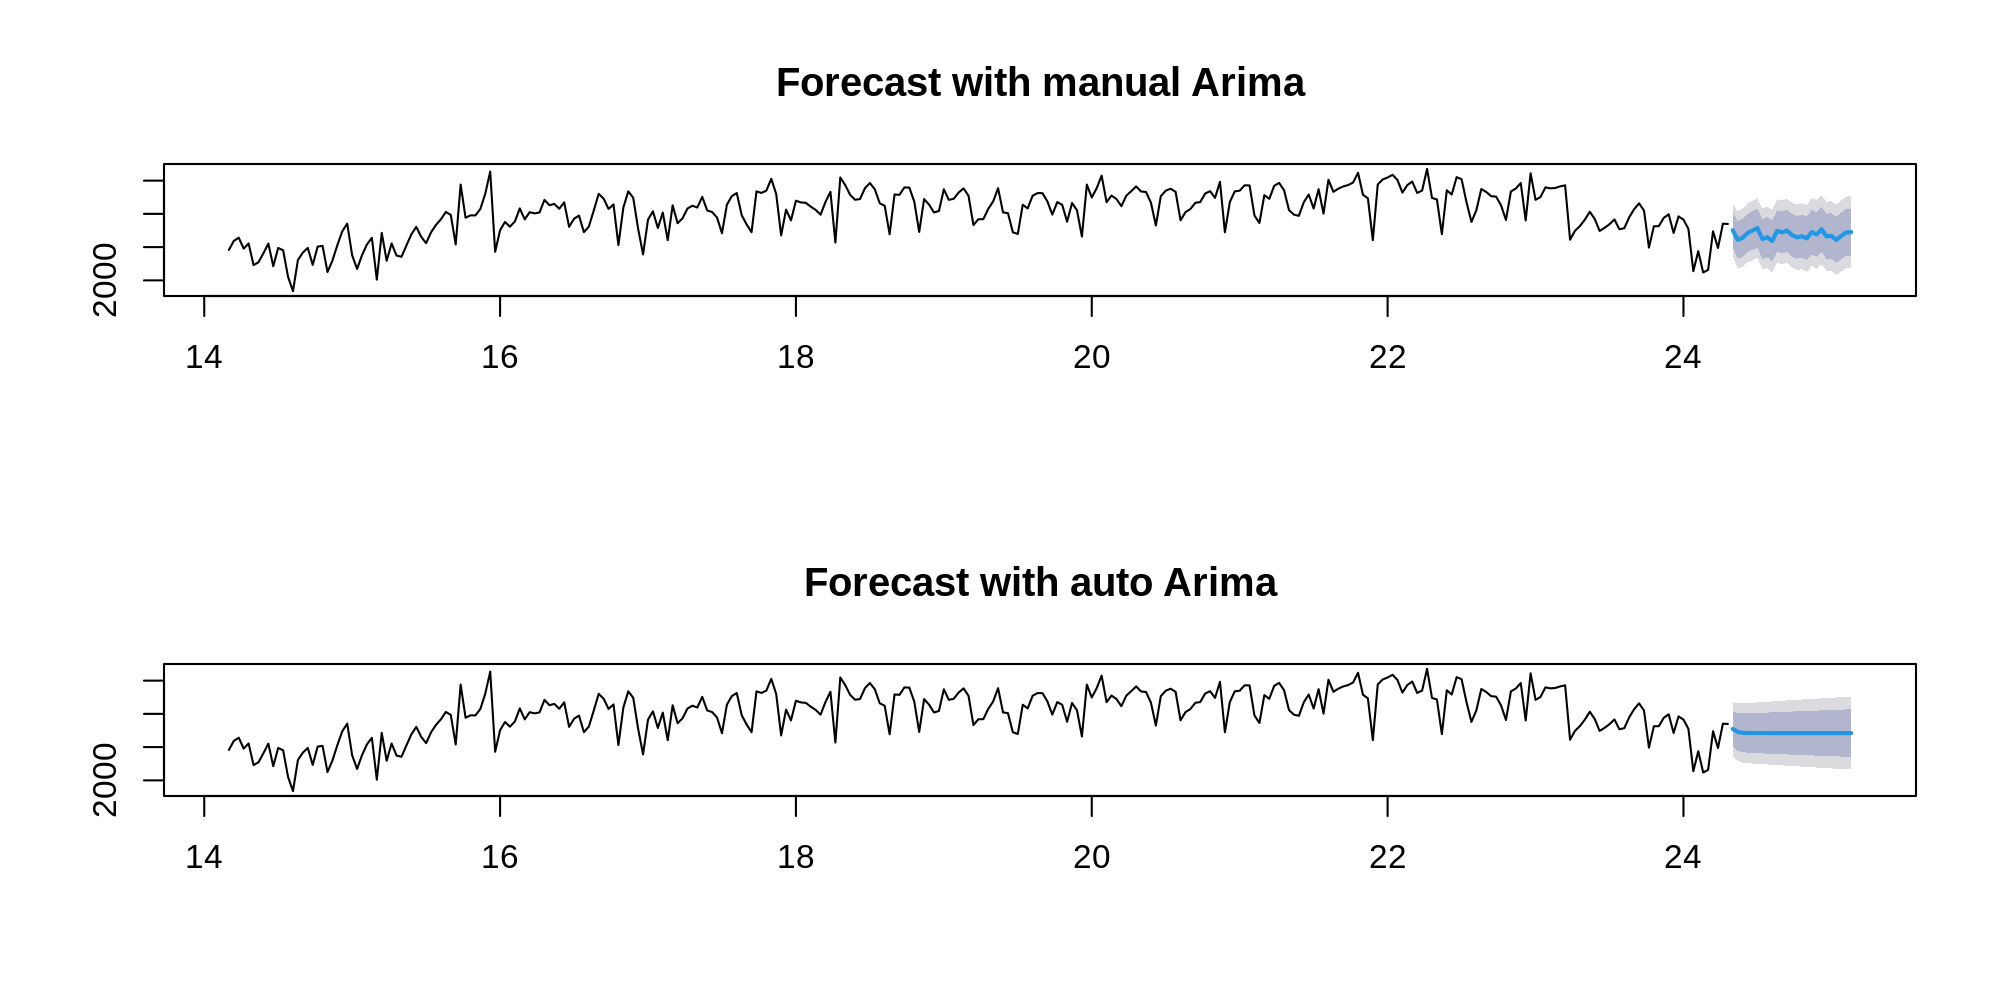

In [ ]:
#Forecast the next 25 observation and plot the original ts and the forecasted one
TS_count_desnl_frcst_man <- forecast(manual_fit, h=25)
TS_count_desnl_frcst_auto <- forecast(auto_fit, h=25)

par(mfrow=c(2,1))
plot(TS_count_desnl_frcst_man, main = "Forecast with manual Arima", include = test_set)
plot(TS_count_desnl_frcst_auto, main = "Forecast with auto Arima", include = test_set)

The manual Arima model gives a more natural forecast than the auto Arima one.